## Loading the chemist evaluation and checking percentages of prefered evaluation

In [8]:
import json
import pandas as pd

# --- Load Files ---

interpretations_path = "../src/interpretations.json" 
mapping_csv_path = "../data/alab_synthesis_data/AIFvsDara_LOG_updated.csv"
evaluation_csv_path = "../data/alab_synthesis_data/Dara-AIF_evaluation.csv"

with open(interpretations_path, "r") as f:
    interpretations_data = json.load(f)

In [317]:
import matplotlib.pyplot as plt
import pandas as pd

def summarize_true_chemist_preferences(evaluation_df, mapping_df, plot_title="True Chemist Preferences (Resolved AIF/DARA)"):
    """
    Correctly summarizes how often chemists preferred AIF, DARA, both, or neither — 
    by resolving whether interpretation A or B referred to AIF or DARA based on mapping_df.
    Ensures no duplicated rows and avoids overcounting.
    """

    # --- Filter and clean input ---
    eval_filtered = evaluation_df.dropna(subset=["Prefered Interpretation"])
    eval_filtered = eval_filtered[~eval_filtered["Run Name in ALAB"].str.contains("15")]

    # Merge to get mapping of interpretation A to AIF or DARA
    merged = pd.merge(
        eval_filtered,
        mapping_df[["Run Name in ALAB", "Interpr A - explanation"]],
        on="Run Name in ALAB",
        how="left"
    )

    # Drop duplicate run names to avoid double counting
    merged = merged.drop_duplicates(subset=["Run Name in ALAB"])

    # --- Resolve chemist preference into AIF / DARA / both / neither ---
    def resolve_preference(row):
        pref = row["Prefered Interpretation"]
        a_expl = row["Interpr A - explanation"]

        if pd.isna(pref) or pd.isna(a_expl):
            return None
        if pref == "A":
            return "AIF" if a_expl == "AIF interpretation" else "DARA"
        elif pref == "B":
            return "DARA" if a_expl == "AIF interpretation" else "AIF"
        elif pref == "both A & B":
            return "both"
        elif pref == "neither A nor B":
            return "neither"
        return None

    merged["Resolved Preference"] = merged.apply(resolve_preference, axis=1)

    # --- Count preferences ---
    counts = merged["Resolved Preference"].value_counts()
    num_aif = counts.get("AIF", 0)
    num_dara = counts.get("DARA", 0)
    num_both = counts.get("both", 0)
    num_neither = counts.get("neither", 0)
    total = num_aif + num_dara + num_both + num_neither

    # --- Print summary ---
    print(f"Total unique evaluations: {total}")
    print(f"Preferred AIF: {num_aif}")
    print(f"Preferred DARA: {num_dara}")
    print(f"Preferred Both: {num_both}")
    print(f"Preferred Neither: {num_neither}")

    if total > 0:
        print("\nPercentage Breakdown:")
        print(f"AIF: {num_aif / total * 100:.1f}%")
        print(f"DARA: {num_dara / total * 100:.1f}%")
        print(f"Both: {num_both / total * 100:.1f}%")
        print(f"Neither: {num_neither / total * 100:.1f}%")

    # --- Plot ---
    labels = ["AIF", "DARA", "Both", "Neither"]
    counts_list = [num_aif, num_dara, num_both, num_neither]
    percentages = [count / total * 100 if total > 0 else 0 for count in counts_list]

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, percentages, color=["#4CAF50", "#2196F3", "#FFC107", "#F44336"], edgecolor="black")

    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{pct:.1f}%", ha="center", va="bottom", fontsize=11)

    ax.set_ylim(0, max(percentages) + 10)
    ax.set_ylabel("Percentage of Preferences")
    ax.set_title(plot_title)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

Total unique evaluations: 45
Preferred AIF: 14
Preferred DARA: 15
Preferred Both: 9
Preferred Neither: 7

Percentage Breakdown:
AIF: 31.1%
DARA: 33.3%
Both: 20.0%
Neither: 15.6%


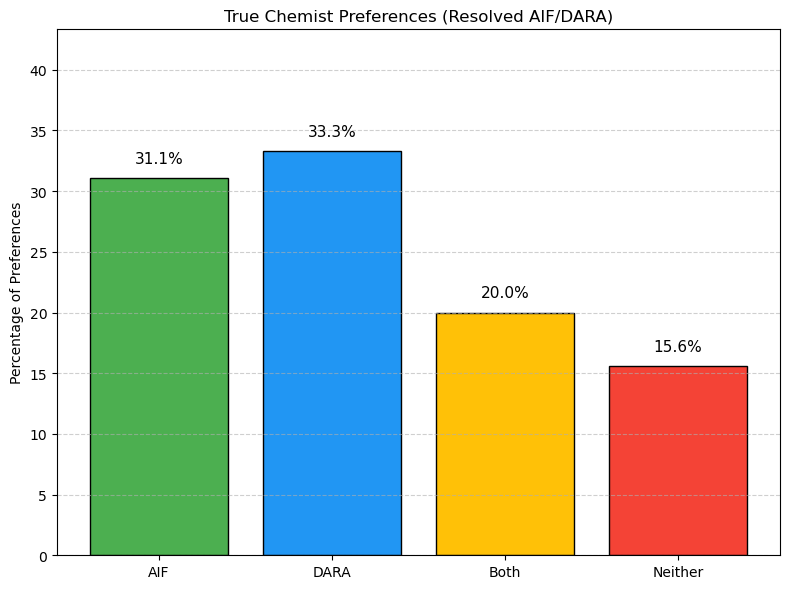

In [318]:
mapping_df = pd.read_csv("../data/alab_synthesis_data/AIFvsDara_LOG_updated.csv")
evaluation_df = pd.read_csv(evaluation_csv_path)
summarize_true_chemist_preferences(evaluation_df, mapping_df)

In [294]:
import matplotlib.pyplot as plt
import pandas as pd

def summarize_true_chemist_preferences_2(evaluation_df, mapping_df, plot_title="True Chemist Preferences (Resolved AIF/DARA)"):
    eval_filtered = evaluation_df.dropna(subset=["Prefered Interpretation"])
    eval_filtered = eval_filtered[~eval_filtered["Run Name in ALAB"].str.contains("15")]

    merged = pd.merge(
        eval_filtered,
        mapping_df[["Run Name in ALAB", "Interpr A - explanation"]],
        on="Run Name in ALAB",
        how="left"
    )

    def resolve_preference(row):
        pref = row["Prefered Interpretation"]
        a_expl = row["Interpr A - explanation"]

        if pd.isna(pref) or pd.isna(a_expl):
            return None
        if pref == "A":
            return "AIF" if a_expl == "AIF interpretation" else "DARA"
        elif pref == "B":
            return "DARA" if a_expl == "AIF interpretation" else "AIF"
        elif pref == "both A & B":
            return "both"
        elif pref == "neither A nor B":
            return "neither"
        return None

    merged["Resolved Preference"] = merged.apply(resolve_preference, axis=1)
    counts = merged["Resolved Preference"].value_counts()

    num_aif = counts.get("AIF", 0)
    num_dara = counts.get("DARA", 0)
    num_both = counts.get("both", 0)
    num_neither = counts.get("neither", 0)
    total = num_aif + num_dara + num_both + num_neither

    print(f"Total completed evaluations: {total}")
    print(f"Preferred AIF: {num_aif}")
    print(f"Preferred DARA: {num_dara}")
    print(f"Preferred Both: {num_both}")
    print(f"Preferred Neither: {num_neither}")

    if total > 0:
        print("\nPercentage Breakdown:")
        print(f"AIF: {(num_aif +num_both) / total * 100:.1f}%")
        print(f"DARA: {(num_dara +num_both)/ total * 100:.1f}%")
        # print(f"Both: {num_both / total * 100:.1f}%")
        print(f"Neither: {num_neither / total * 100:.1f}%")

    # --- Original Plot ---
    labels = ["AIF", "DARA", "Neither"]
    counts_list = [num_aif+num_both, num_dara+num_both, num_neither]
    percentages = [count / total * 100 if total > 0 else 0 for count in counts_list]

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, percentages, color=["#4CAF50", "#2196F3", "#F44336"], edgecolor="black")

    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{pct:.1f}%", ha="center", va="bottom", fontsize=11)

    ax.set_ylim(0, max(percentages) + 10)
    ax.set_ylabel("Percentage of Preferences")
    ax.set_title(plot_title)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

    # --- Adjusted Stats (Both counted in AIF and DARA) ---
    print("\n🔄 Adjusted Interpretation (splitting 'both'):")

    aif_total = num_aif + (num_both / 2)
    dara_total = num_dara + (num_both / 2)
    total_adjusted = aif_total + dara_total + num_neither  # "both" now split

    print(f"AIF (with half of 'both'): {aif_total:.1f} = {(aif_total / total_adjusted * 100):.1f}%")
    print(f"DARA (with half of 'both'): {dara_total:.1f} = {(dara_total / total_adjusted * 100):.1f}%")
    print(f"Neither: {num_neither} = {(num_neither / total_adjusted * 100):.1f}%")

Total completed evaluations: 45
Preferred AIF: 14
Preferred DARA: 15
Preferred Both: 9
Preferred Neither: 7

Percentage Breakdown:
AIF: 51.1%
DARA: 53.3%
Neither: 15.6%


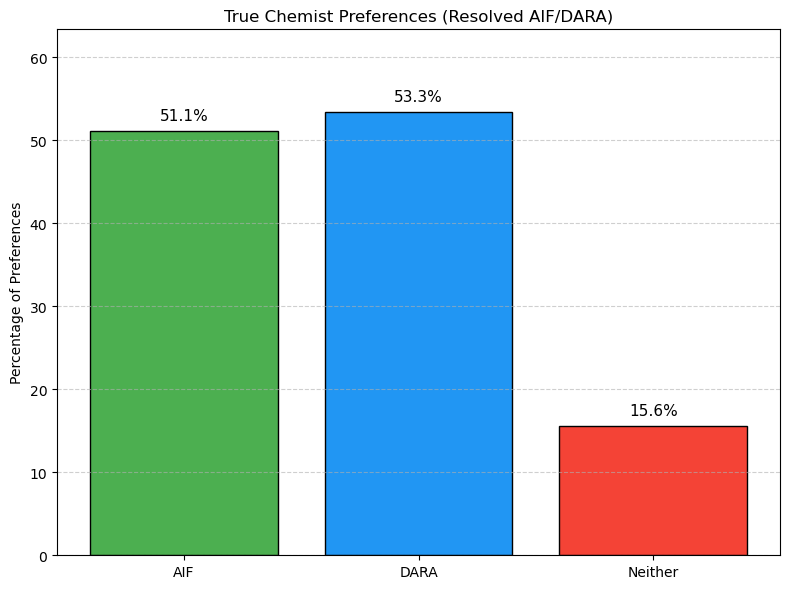


🔄 Adjusted Interpretation (splitting 'both'):
AIF (with half of 'both'): 18.5 = 41.1%
DARA (with half of 'both'): 19.5 = 43.3%
Neither: 7 = 15.6%


In [295]:
summarize_true_chemist_preferences_2(evaluation_df, mapping_df)

# Checking which interpretation was selected by AIF

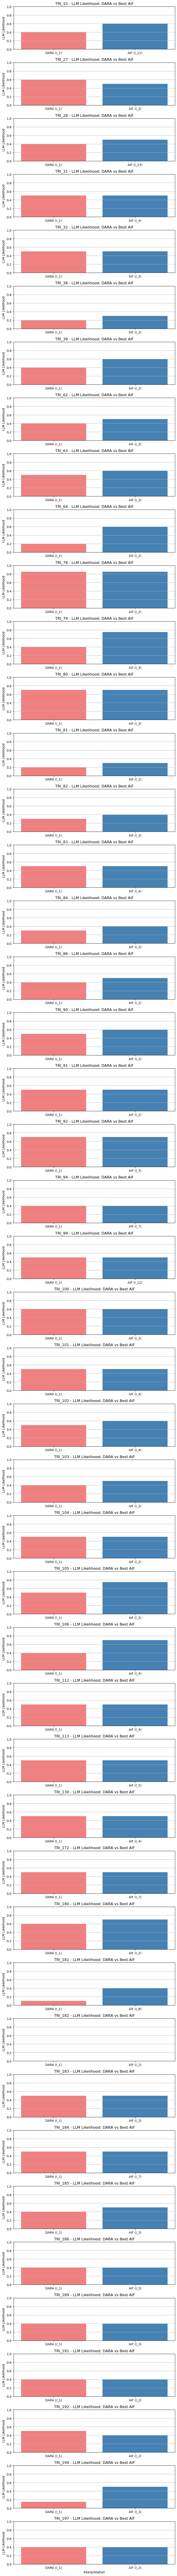

In [18]:


# Choose the specific TRI samples you want to plot
# selected_samples = ["TRI_15", "TRI_27", "TRI_28", "TRI_78", "TRI_80", "TRI_81", "TRI_82", "TRI_83", "TRI_84", "TRI_86"]
# Step 1: Load your evaluation dataframe
evaluation_df = pd.read_csv(evaluation_csv_path)

# Step 2: Extract TRI sample names where a preference was recorded
tri_names_from_evaluations = (
    evaluation_df
    .dropna(subset=["Prefered Interpretation"])
    ["Run Name in ALAB"]
    .dropna()
    .apply(lambda x: x.strip().replace("-", "_"))  # Normalize to match interpretation keys
    .unique()
    .tolist()
)

# Collect LLM scores for DARA and best AIF per sample
plot_data = {}

for tri_key in tri_names_from_evaluations:
    sample = interpretations_data.get(tri_key, {})
    if not sample:
        continue

    dara_llm = sample.get("I_1", {}).get("LLM_interpretation_likelihood", None)

    best_key = None
    best_posterior = -1
    for k, v in sample.items():
        if k != "I_1" and v.get("posterior_probability", -1) > best_posterior:
            best_posterior = v["posterior_probability"]
            best_key = k

    aif_llm = sample.get(best_key, {}).get("LLM_interpretation_likelihood", None) if best_key else None

    if dara_llm is not None and aif_llm is not None:
        plot_data[tri_key] = {
            "DARA (I_1)": dara_llm,
            f"AIF ({best_key})": aif_llm
        }
    
# Check if there’s anything to plot
if not plot_data:
    print("⚠️ No valid samples found with both DARA and AIF LLM scores.")
else:
    # Plot each sample in its own subplot
    num_samples = len(plot_data)
    fig, axes = plt.subplots(nrows=num_samples, ncols=1, figsize=(8, 2.5 * num_samples), sharey=True)

    if num_samples == 1:
        axes = [axes]

    for ax, (sample_name, scores) in zip(axes, plot_data.items()):
        labels = list(scores.keys())
        values = list(scores.values())
        ax.bar(labels, values, color=["lightcoral", "steelblue"])
        ax.set_ylim(0, 1)
        ax.set_ylabel("LLM Likelihood")
        ax.set_title(f"{sample_name} - LLM Likelihood: DARA vs Best AIF")
        ax.grid(True, axis='y')

    axes[-1].set_xlabel("Interpretation")
    plt.tight_layout()
    plt.show()

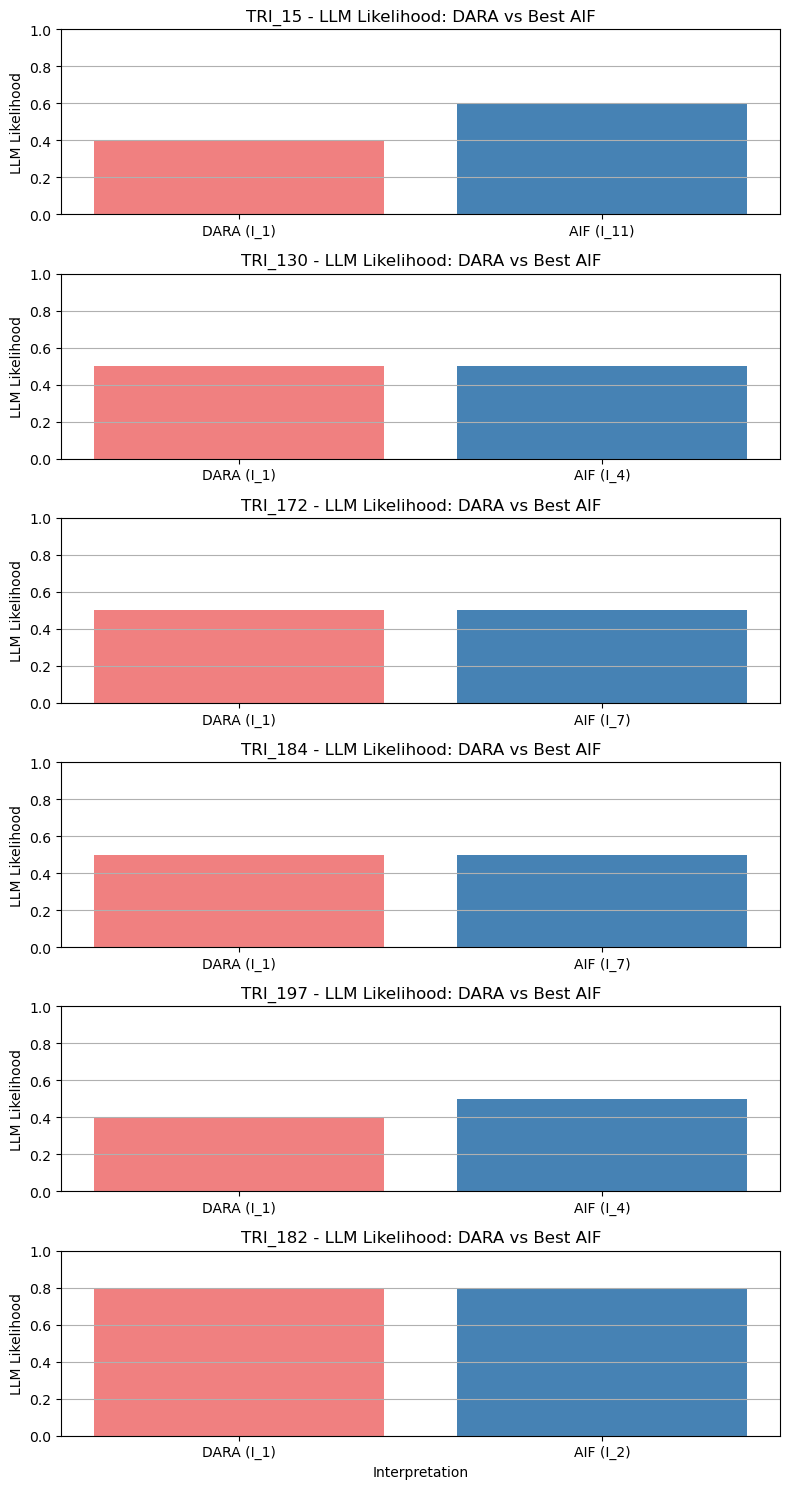

In [21]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# --- Load interpretation files ---
with open("../src/interpretations.json", "r") as f:
    interpretations_default = json.load(f)

with open("../src/interpretations_new.json", "r") as f:
    interpretations_new = json.load(f)

with open("../src/interpretations_llm_flat.json", "r") as f:
    interpretations_llm = json.load(f)

# --- Define sample-specific mapping ---
use_new_samples = ["TRI_130", "TRI_197"] # "TRI_15", "TRI_172", "TRI_184",
use_llm_samples = ["TRI_182"]

# --- Samples to plot ---
selected_samples = use_new_samples + use_llm_samples

# --- Helper: Normalize key style ---
def normalize_key(name):
    return name.strip().replace("-", "_")

# --- Collect plot data ---
plot_data = {}

for tri_raw in selected_samples:
    tri_key = normalize_key(tri_raw)

    # Choose the right interpretation source
    if tri_raw in use_new_samples:
        source = interpretations_new
    elif tri_raw in use_llm_samples:
        source = interpretations_llm
    else:
        source = interpretations_default

    sample = source.get(tri_key, {})
    if not sample or "I_1" not in sample:
        print(f"⚠️ Skipping {tri_key}, missing I_1.")
        continue

    dara_llm = sample["I_1"].get("LLM_interpretation_likelihood", None)

    # Find best AIF interpretation
    best_key = None
    best_posterior = -1
    for k, v in sample.items():
        if k != "I_1" and v.get("posterior_probability", -1) > best_posterior:
            best_posterior = v["posterior_probability"]
            best_key = k

    aif_llm = sample.get(best_key, {}).get("LLM_interpretation_likelihood", None) if best_key else None

    if dara_llm is not None and aif_llm is not None:
        plot_data[tri_key] = {
            "DARA (I_1)": dara_llm,
            f"AIF ({best_key})": aif_llm
        }

# --- Plot ---
if not plot_data:
    print("⚠️ No valid samples found for plotting.")
else:
    num_samples = len(plot_data)
    fig, axes = plt.subplots(nrows=num_samples, ncols=1, figsize=(8, 2.5 * num_samples), sharey=True)

    if num_samples == 1:
        axes = [axes]

    for ax, (sample_name, scores) in zip(axes, plot_data.items()):
        labels = list(scores.keys())
        values = list(scores.values())
        ax.bar(labels, values, color=["lightcoral", "steelblue"])
        ax.set_ylim(0, 1)
        ax.set_ylabel("LLM Likelihood")
        ax.set_title(f"{sample_name} - LLM Likelihood: DARA vs Best AIF")
        ax.grid(True, axis='y')

    axes[-1].set_xlabel("Interpretation")
    plt.tight_layout()
    plt.show()

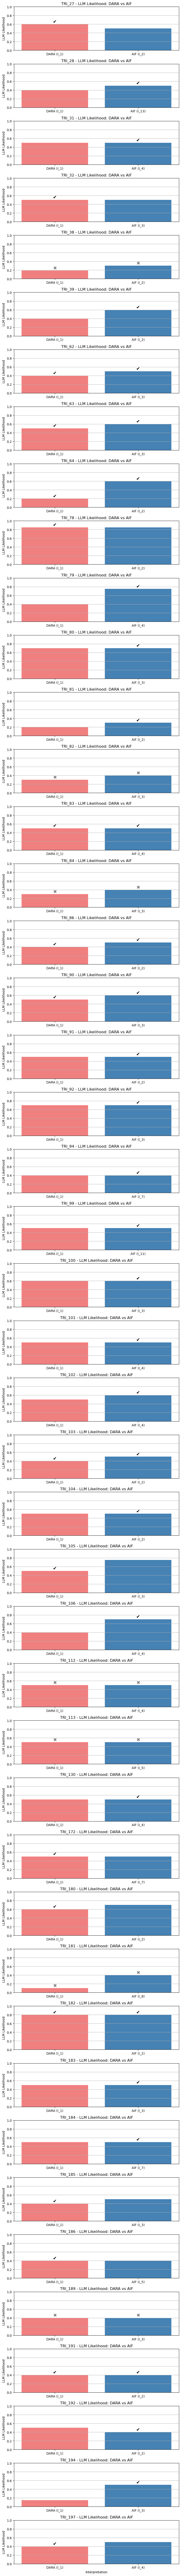

In [24]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# --- Load interpretation files ---
with open("../src/interpretations.json", "r") as f:
    interpretations_default = json.load(f)

with open("../src/interpretations_new.json", "r") as f:
    interpretations_new = json.load(f)

with open("../src/interpretations_llm_flat.json", "r") as f:
    interpretations_llm = json.load(f)

# --- Load evaluation CSV ---
evaluation_df = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_evaluation.csv")
evaluation_df = evaluation_df[~evaluation_df["Run Name in ALAB"].str.contains("15")]
evaluation_df = evaluation_df.dropna(subset=["Prefered Interpretation"])

# --- Define special cases for source selection ---
use_new_samples = ["TRI_130", "TRI_197"]
use_llm_samples = ["TRI_182"]

# --- Normalize name helper ---
def normalize_key(name):
    return name.strip().replace("-", "_")

# --- Collect TRI names with chemist preference ---
tri_names_from_evaluations = (
    evaluation_df
    ["Run Name in ALAB"]
    .dropna()
    .apply(normalize_key)
    .unique()
    .tolist()
)

# --- Plotting data ---
plot_data = []

for tri_key in tri_names_from_evaluations:
    # Pick the correct interpretation source
    if tri_key in use_new_samples:
        source = interpretations_new
    elif tri_key in use_llm_samples:
        source = interpretations_llm
    else:
        source = interpretations_default

    sample = source.get(tri_key, {})
    if not sample or "I_1" not in sample:
        continue

    dara_llm = sample["I_1"].get("LLM_interpretation_likelihood", None)

    # Find best AIF interpretation
    best_key = None
    best_posterior = -1
    for k, v in sample.items():
        if k != "I_1" and v.get("posterior_probability", -1) > best_posterior:
            best_posterior = v["posterior_probability"]
            best_key = k

    aif_llm = sample.get(best_key, {}).get("LLM_interpretation_likelihood", None) if best_key else None

    # Get chemist's preference for this sample
    chemist_pref = evaluation_df[evaluation_df["Run Name in ALAB"].str.replace("-", "_") == tri_key]["Prefered Interpretation"]
    preference = chemist_pref.values[0] if not chemist_pref.empty else None

    if dara_llm is not None and aif_llm is not None:
        plot_data.append({
            "tri_key": tri_key,
            "dara_llm": dara_llm,
            "aif_llm": aif_llm,
            "aif_key": best_key,
            "preference": preference
        })

# --- Plot ---
if not plot_data:
    print("⚠️ No valid samples found with both LLM scores and chemist preference.")
else:
    num_samples = len(plot_data)
    fig, axes = plt.subplots(nrows=num_samples, ncols=1, figsize=(8, 2.5 * num_samples), sharey=True)

    if num_samples == 1:
        axes = [axes]

    for ax, sample in zip(axes, plot_data):
        labels = ["DARA (I_1)", f"AIF ({sample['aif_key']})"]
        values = [sample["dara_llm"], sample["aif_llm"]]
        bars = ax.bar(labels, values, color=["lightcoral", "steelblue"])
        ax.set_ylim(0, 1)
        ax.set_ylabel("LLM Likelihood")
        ax.set_title(f"{sample['tri_key']} - LLM Likelihood: DARA vs AIF")

        # Add stars based on chemist's preference
        pref = sample["preference"]
        if pref == "A":
            ax.text(1, sample["aif_llm"] + 0.03, "✔", ha='center', fontsize=14)
        elif pref == "B":
            ax.text(0, sample["dara_llm"] + 0.03, "✔", ha='center', fontsize=14)
        elif pref == "both A & B":
            ax.text(0, sample["dara_llm"] + 0.03, "✔", ha='center', fontsize=14)
            ax.text(1, sample["aif_llm"] + 0.03, "✔", ha='center', fontsize=14)
        elif pref == "neither A nor B":
            ax.text(0, sample["dara_llm"] + 0.03, "✖", ha='center', fontsize=14, color='gray')
            ax.text(1, sample["aif_llm"] + 0.03, "✖", ha='center', fontsize=14, color='gray')

        ax.grid(True, axis='y')

    axes[-1].set_xlabel("Interpretation")
    plt.tight_layout()
    plt.show()

TRI_62 xxx In both and disagreement → DARA: 0.4  AIF: 0.5
TRI_63 ###### In both and agreement → DARA: 0.5  AIF: 0.6
TRI_64 xxx In both and disagreement → DARA: 0.2  AIF: 0.6
TRI_83 xxx In both and disagreement → DARA: 0.5  AIF: 0.5
TRI_86 xxx In both and disagreement → DARA: 0.4  AIF: 0.5
TRI_90 ###### In both and agreement → DARA: 0.5  AIF: 0.6
TRI_103 xxx In both and disagreement → DARA: 0.4  AIF: 0.5
TRI_182 ###### In both and agreement → DARA: 0.8  AIF: 0.8
TRI_191 xxx In both and disagreement → DARA: 0.4  AIF: 0.4


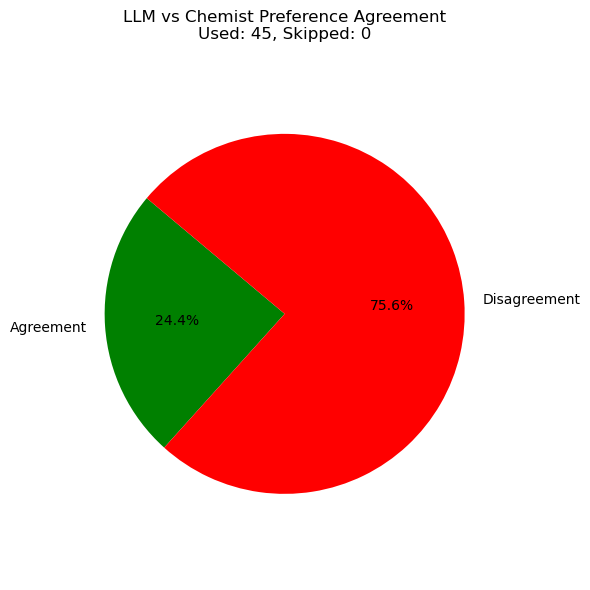

In [341]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# --- Load interpretation sources ---
with open("../src/interpretations.json", "r") as f:
    interpretations_default = json.load(f)

with open("../src/interpretations_new.json", "r") as f:
    interpretations_new = json.load(f)

with open("../src/interpretations_llm_flat.json", "r") as f:
    interpretations_llm = json.load(f)

# --- Define sample-specific overrides ---
use_new_samples = ["TRI_130", "TRI_197"]
use_llm_samples = ["TRI_182"]

def normalize_key(name):
    return name.strip().replace("-", "_")

def get_sample(tri_key):
    if tri_key in use_new_samples:
        return interpretations_new.get(tri_key, {})
    elif tri_key in use_llm_samples:
        return interpretations_llm.get(tri_key, {})
    else:
        return interpretations_default.get(tri_key, {})
def llm_to_evaluation_score(llm_value):
    if llm_value is None:
        return 0.0
    elif llm_value < 0.45:
        return 0.0
    elif llm_value < 0.55:
        return 0.5
    else:
        return 1.0
# --- Load evaluation data ---
evaluation_df = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_evaluation.csv")
evaluation_df = evaluation_df.dropna(subset=["Prefered Interpretation"])
evaluation_df = evaluation_df[~evaluation_df["Run Name in ALAB"].str.contains("15")]

# --- Compare preferences ---
agreement = 0
disagreement = 0
skipped = 0

for _, row in evaluation_df.iterrows():
    tri = normalize_key(row["Run Name in ALAB"])
    preferred = row["Prefered Interpretation"]

    sample = get_sample(tri)
    if not sample or "I_1" not in sample:
        skipped += 1
        continue

    dara = sample["I_1"]
    best_key = max(
        (k for k in sample if k != "I_1"),
        key=lambda k: sample[k].get("posterior_probability", -1),
        default=None
    )
    if not best_key:
        skipped += 1
        continue

    aif = sample[best_key]
    # llm_dara = dara.get("LLM_interpretation_likelihood")
    # llm_aif = aif.get("LLM_interpretation_likelihood")
    llm_dara = llm_to_evaluation_score(dara.get("LLM_interpretation_likelihood"))
    llm_aif = llm_to_evaluation_score(aif.get("LLM_interpretation_likelihood"))

    if llm_dara is None or llm_aif is None:
        skipped += 1
        continue

    # Compute logic based on chemist preference
    diff = abs(llm_dara - llm_aif)
    max_llm = max(llm_dara, llm_aif)
    min_llm = min(llm_dara, llm_aif)

    if preferred == "A":
        agreement += int(llm_aif > llm_dara)
        disagreement += int(llm_aif <= llm_dara)
    elif preferred == "B":
        agreement += int(llm_dara > llm_aif)
        disagreement += int(llm_dara <= llm_aif)
    elif preferred == "both A & B":
        if diff < 0.1 and max_llm > 0.5:
            agreement += 1
            print(tri, "###### In both and agreement → DARA:", llm_dara, " AIF:", llm_aif)
        else:
            disagreement += 1
            print(tri, "xxx In both and disagreement → DARA:", llm_dara, " AIF:", llm_aif)
    elif preferred == "neither A nor B":
        if diff < 0.1 and max_llm < 0.4:
            agreement += 1
        else:
            disagreement += 1
    else:
        skipped += 1

# --- Plot results ---
labels = ['Agreement', 'Disagreement']
sizes = [agreement, disagreement]
colors = ['green', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f"LLM vs Chemist Preference Agreement\nUsed: {agreement + disagreement}, Skipped: {skipped}")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Compute the weights of the 4 parameters 

/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_56597/748911406.py:112: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


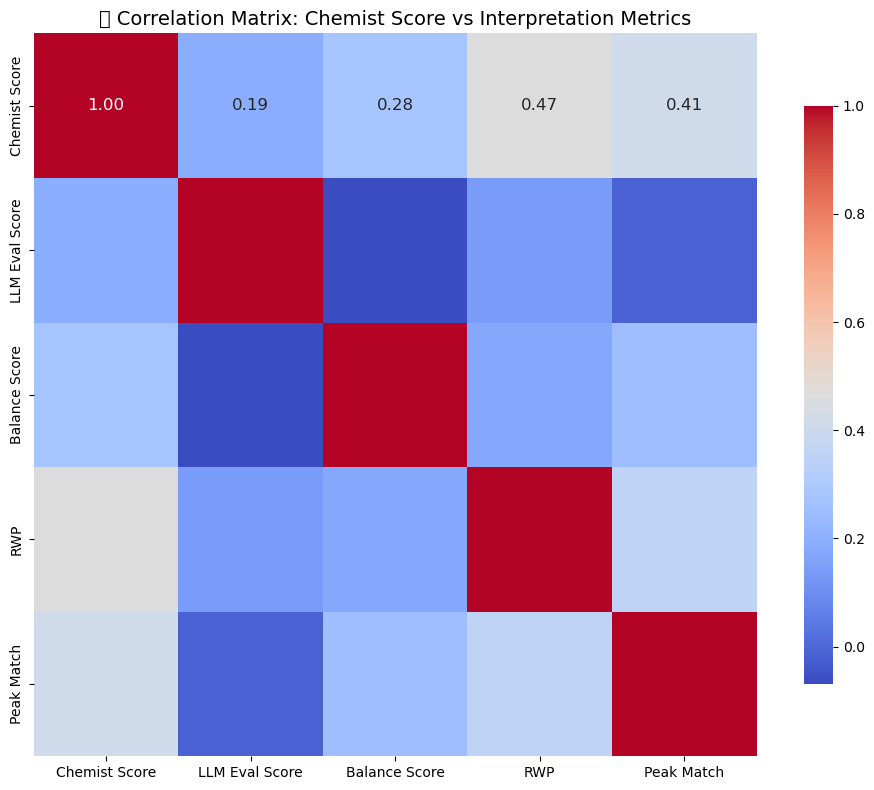

In [58]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load interpretation files
with open("../src/interpretations_new.json", "r") as f:
    interpretations_default = json.load(f)

with open("../src/interpretations_new.json", "r") as f:
    interpretations_new = json.load(f)

with open("../src/interpretations_llm_flat.json", "r") as f:
    interpretations_llm = json.load(f)

# Sample-specific source selection
use_new_samples = ["TRI_130", "TRI_197"]
use_llm_samples = ["TRI_182"]

# Normalize TRI naming
def normalize_key(name):
    return name.strip().replace("-", "_")

def get_sample(tri_key):
    if tri_key in use_new_samples:
        return interpretations_new.get(tri_key, {})
    elif tri_key in use_llm_samples:
        return interpretations_llm.get(tri_key, {})
    else:
        return interpretations_default.get(tri_key, {})

# Load evaluation data
mapping_df = pd.read_csv("../data/alab_synthesis_data/AIFvsDara_LOG_updated.csv")
evaluation_df = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_evaluation.csv")
evaluation_df = evaluation_df[~evaluation_df["Run Name in ALAB"].str.contains("15")]
evaluation_df = evaluation_df.dropna(subset=[
    "Interpretation A: Human Evaluation (0-1, 1 is best)", 
    "Interpretation B: Human Evaluation"
])

def normalize_chemist_score(score):
    return score * 100



# Collect data rows
data_rows = []
for _, row in evaluation_df.iterrows():
    tri_key = normalize_key(row["Run Name in ALAB"])
    mapping_row = mapping_df[mapping_df["Run Name in ALAB"] == row["Run Name in ALAB"]]

    if mapping_row.empty:
        continue

    explanation_a = mapping_row.iloc[0]["Interpr A - explanation"]
    sample = get_sample(tri_key)

    if not sample or "I_1" not in sample:
        continue

    interp_dara = sample["I_1"]
    aif_candidates = {k: v for k, v in sample.items() if k.startswith("I_") and k != "I_1"}
    if not aif_candidates:
        continue

    best_key = max(aif_candidates, key=lambda k: aif_candidates[k].get("posterior_probability", 0))
    interp_aif = aif_candidates[best_key]

    if explanation_a == "AIF interpretation":
        interp_a, interp_b = interp_aif, interp_dara
    elif explanation_a == "Dara interpretation":
        interp_a, interp_b = interp_dara, interp_aif
    else:
        continue

    def extract_row(source, chemist_score, label):
        return {
            "Label": label,
            "Chemist Score": chemist_score,
            "LLM Eval Score": source.get("LLM_interpretation_likelihood", 0),
            "Balance Score": source.get("balance_score", 0),
            "RWP": source.get("normalized_rwp", 0),
            "Peak Match": source.get("normalized_score", 0)
        }

    # chemist_score_a = normalize_chemist_score(row["Interpretation A: Human Evaluation (0-1, 1 is best)"])
    # chemist_score_b = normalize_chemist_score(row["Interpretation B: Human Evaluation"])
    chemist_score_a = row["Interpretation A: Human Evaluation (0-1, 1 is best)"]
    chemist_score_b = row["Interpretation B: Human Evaluation"]

    data_rows.append(extract_row(interp_a, chemist_score_a, "Interpretation A"))
    data_rows.append(extract_row(interp_b, chemist_score_b, "Interpretation B"))

# Convert to DataFrame
correlation_df = pd.DataFrame(data_rows)

# Compute correlation
corr = correlation_df.drop(columns=["Label"]).corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    annot_kws={"size": 12}, 
    cbar_kws={"shrink": 0.8},
    square=True
)
plt.title("🔗 Correlation Matrix: Chemist Score vs Interpretation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

In [55]:
correlation_df

,Label,Chemist Score,LLM Eval Score,Balance Score,RWP,Peak Match
0,Interpretation A,0.0,0.3,0.921600,0.83650,0.650867
1,Interpretation B,1.0,0.6,1.000000,0.85850,0.416152
2,Interpretation A,1.0,0.3,0.977500,0.86050,0.420210
3,Interpretation B,0.5,0.3,0.967600,0.83375,0.564587
4,Interpretation A,1.0,0.2,0.999900,0.87875,0.511924
...,...,...,...,...,...,...
83,Interpretation B,1.0,0.2,0.987900,0.81125,0.440850
84,Interpretation A,1.0,0.2,0.998889,0.77025,0.453957
85,Interpretation B,0.5,0.2,0.965156,0.54950,0.478324
86,Interpretation A,0.0,0.0,0.998400,0.59600,0.900000


In [2]:
import json
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

# --- Load interpretation sources ---
with open("../src/interpretations_new.json", "r") as f:
    interpretations_default = json.load(f)

with open("../src/interpretations_new.json", "r") as f:
    interpretations_new = json.load(f)

# with open("../src/interpretations_llm_flat.json", "r") as f:
#     interpretations_llm = json.load(f)

with open("../src/interpretations_new_llm_approach_May7.json", "r") as f:
    interpretations_llm = json.load(f)

# --- Define sample-specific source routing ---
use_new_samples = ["TRI_130", "TRI_197"]
use_llm_samples = ["TRI_182"]

def normalize_key(name):
    return name.strip().replace("-", "_")

def get_sample(tri_key):
    if tri_key in use_new_samples:
        return interpretations_new.get(tri_key, {})
    elif tri_key in use_llm_samples:
        return interpretations_llm.get(tri_key, {})
    else:
        return interpretations_default.get(tri_key, {})

# --- Load data ---
mapping_df = pd.read_csv("../data/alab_synthesis_data/AIFvsDara_LOG_updated.csv")
evaluation_df = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_evaluation.csv")
evaluation_df = evaluation_df[~evaluation_df["Run Name in ALAB"].str.contains("15")]
evaluation_df = evaluation_df.dropna(subset=[
    "Interpretation A: Human Evaluation (0-1, 1 is best)",
    "Interpretation B: Human Evaluation"
])

# --- Helper functions ---
def normalize_chemist_score(score):
    return score * 100

def llm_to_evaluation_score(llm_value):
    if llm_value is None:
        return 0.0
    elif llm_value < 0.45:
        return 0.0
    elif llm_value < 0.55:
        return 0.5
    else:
        return 1.0

# --- Collect rows for optimization ---
prior_rows = []
x_rows = []

for _, eval_row in evaluation_df.iterrows():
    run_name = eval_row["Run Name in ALAB"]
    tri_key = normalize_key(run_name)

    mapping_row = mapping_df[mapping_df["Run Name in ALAB"] == run_name]
    if mapping_row.empty:
        continue

    explanation_a = mapping_row.iloc[0]["Interpr A - explanation"]
    sample = get_sample(tri_key)
    if not sample or "I_1" not in sample:
        continue

    interp_dara = sample["I_1"]
    aif_candidates = {k: v for k, v in sample.items() if k.startswith("I_") and k != "I_1"}
    if not aif_candidates:
        continue

    best_aif_key = max(aif_candidates, key=lambda k: aif_candidates[k].get("posterior_probability", 0))
    interp_aif = aif_candidates[best_aif_key]

    if explanation_a == "AIF interpretation":
        interp_a, interp_b = interp_aif, interp_dara
    elif explanation_a == "Dara interpretation":
        interp_a, interp_b = interp_dara, interp_aif
    else:
        continue

    chemist_score_a = normalize_chemist_score(eval_row["Interpretation A: Human Evaluation (0-1, 1 is best)"])
    chemist_score_b = normalize_chemist_score(eval_row["Interpretation B: Human Evaluation"])

    for interp, score in [(interp_a, chemist_score_a), (interp_b, chemist_score_b)]:
        prior_rows.append({
            "LLM_eval": interp.get("LLM_interpretation_likelihood", 0),
            "Balance": interp.get("balance_score", 0),
            "Chemist": score
        })
        x_rows.append({
            "RWP": interp.get("normalized_rwp", 0),
            "PeakMatch": interp.get("normalized_score", 0),
            "Chemist": score
        })

# --- Create DataFrames ---
prior_df = pd.DataFrame(prior_rows)
x_df = pd.DataFrame(x_rows)

# --- Define optimization functions ---
def optimize_prior(weights):
    w_llm, w_balance = weights
    prior = (w_llm * prior_df["LLM_eval"] + w_balance * prior_df["Balance"]) / (w_llm + w_balance + 1e-8)
    return mean_squared_error(prior_df["Chemist"], prior * 100)

def optimize_x(weights):
    w_rwp, w_peak = weights
    x = (w_rwp * x_df["RWP"] + w_peak * x_df["PeakMatch"]) / (w_rwp + w_peak + 1e-8)
    return mean_squared_error(x_df["Chemist"], x * 100)

# --- Run optimizations ---
res_prior = minimize(optimize_prior, [1.0, 1.0], method='Nelder-Mead', bounds=[(0, 1), (0, 1)])
res_x = minimize(optimize_x, [1.0, 1.0], method='Nelder-Mead', bounds=[(0, 1), (0, 1)])

# --- Print results ---
print("For Nelder-Mead method")
print("✅ Optimized Prior Weights:")
print(f"  LLM_eval weight:     {res_prior.x[0]:.4f}")
print(f"  Balance score weight:{res_prior.x[1]:.4f}")

print("\n✅ Optimized X (Fit Quality) Weights:")
print(f"  RWP weight:          {res_x.x[0]:.4f}")
print(f"  Peak match weight:   {res_x.x[1]:.4f}")


For Nelder-Mead method
✅ Optimized Prior Weights:
  LLM_eval weight:     0.6210
  Balance score weight:1.0000

✅ Optimized X (Fit Quality) Weights:
  RWP weight:          1.0000
  Peak match weight:   0.8479



=== 🔧 Optimization using Nelder-Mead method ===
✅ Optimized Prior Weights:
  LLM_eval weight:      0.6174
  Balance score weight: 1.0000

✅ Optimized X (Fit Quality) Weights:
  RWP weight:           1.0000
  Peak match weight:    0.6508

=== 🔧 Optimization using Powell method ===
✅ Optimized Prior Weights:
  LLM_eval weight:      0.6173
  Balance score weight: 0.9999

✅ Optimized X (Fit Quality) Weights:
  RWP weight:           0.9999
  Peak match weight:    0.6507

=== 🔧 Optimization using L-BFGS-B method ===
✅ Optimized Prior Weights:
  LLM_eval weight:      0.6174
  Balance score weight: 1.0000

✅ Optimized X (Fit Quality) Weights:
  RWP weight:           1.0000
  Peak match weight:    0.6508

=== 🔧 Optimization using SLSQP method ===
✅ Optimized Prior Weights:
  LLM_eval weight:      0.3732
  Balance score weight: 0.6044

✅ Optimized X (Fit Quality) Weights:
  RWP weight:           0.6657
  Peak match weight:    0.4333

=== 🔧 Optimization using TNC method ===
✅ Optimized Prior Wei

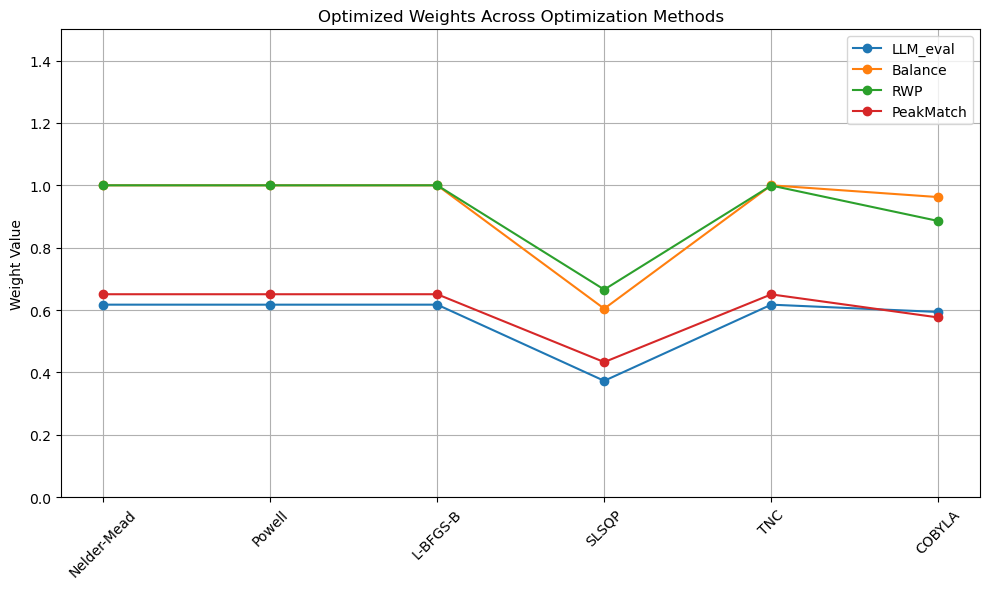

In [156]:
from scipy.optimize import minimize

methods = [
    "Nelder-Mead",   # does NOT support bounds (but included for comparison)
    "Powell",
    "L-BFGS-B",
    "SLSQP",
    "TNC",
    "COBYLA"         # supports only inequality constraints
]

initial_weights = [1.0, 1.0]
bounds = [(0, 1), (0, 1)]
results=[]

for method in methods:
    print(f"\n=== 🔧 Optimization using {method} method ===")
    
    # COBYLA does not support bounds as a parameter
    
    res_prior = minimize(optimize_prior, initial_weights, method=method, bounds=bounds)
    res_x = minimize(optimize_x, initial_weights, method=method, bounds=bounds)
        
    results.append({
            "Method": method,
            "LLM_eval": res_prior.x[0],
            "Balance": res_prior.x[1],
            "RWP": res_x.x[0],
            "PeakMatch": res_x.x[1]
        })
   

    # Print results
    print("✅ Optimized Prior Weights:")
    print(f"  LLM_eval weight:      {res_prior.x[0]:.4f}")
    print(f"  Balance score weight: {res_prior.x[1]:.4f}")

    print("\n✅ Optimized X (Fit Quality) Weights:")
    print(f"  RWP weight:           {res_x.x[0]:.4f}")
    print(f"  Peak match weight:    {res_x.x[1]:.4f}")

 # Convert to DataFrame
df_results = pd.DataFrame(results)

# Plot
plt.figure(figsize=(10, 6))
for metric in ["LLM_eval", "Balance", "RWP", "PeakMatch"]:
    plt.plot(df_results["Method"], df_results[metric], marker='o', label=metric)

plt.title("Optimized Weights Across Optimization Methods")
plt.ylabel("Weight Value")
plt.ylim(0, 1.5)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    

In [159]:
# Quicky check on the update of the posterior probability
L_llm=0.8
L_bs=0.9
L_rwp=0.6
L_score= 0.7

w_llm=0.61736
w_bs=1
w_rwp=1
w_score=0.6508

original_prior = (L_llm +L_bs)/2
original_fit_quality = (L_rwp + L_score)/2
original_posterior = original_prior*original_fit_quality

weighted_prior = (w_llm*L_llm +w_bs*L_bs)/(w_llm +w_bs)
weighted_fit_quality = (w_rwp*L_rwp + w_score*L_score)/(w_rwp+w_score)
weighted_posterior = weighted_prior*weighted_fit_quality

print(" The original unweighted values ")
print("Original prior = ",round(original_prior,4))
print("Original fit quality = ", round(original_fit_quality,4))
print("Original posterior = ", round(original_posterior,4))
print("")

print(" The new weighted values ")
print("Weighted prior = ",round(weighted_prior,4))
print("Weighted fit quality = ", round(weighted_fit_quality,4))
print("Weighted posterior = ", round(weighted_posterior,4))

w_llm=0.4
w_bs=1
w_rwp=1
w_score=1

weighted_prior = (w_llm*L_llm +w_bs*L_bs)/(w_llm +w_bs)
weighted_fit_quality = (w_rwp*L_rwp + w_score*L_score)/(w_rwp+w_score)
weighted_posterior = weighted_prior*weighted_fit_quality
print("")

print(" The new weighted values ")
print("Weighted prior = ",round(weighted_prior,4))
print("Weighted fit quality = ", round(weighted_fit_quality,4))
print("Weighted posterior = ", round(weighted_posterior,4))


w_llm=0.4
w_bs=1
w_rwp=0.6
w_score=1

weighted_prior = (w_llm*L_llm +w_bs*L_bs)/(w_llm +w_bs)
weighted_fit_quality = (w_rwp*L_rwp + w_score*L_score)/(w_rwp+w_score)
weighted_posterior = weighted_prior*weighted_fit_quality
print("")

print(" The new weighted values ")
print("Weighted prior = ",round(weighted_prior,4))
print("Weighted fit quality = ", round(weighted_fit_quality,4))
print("Weighted posterior = ", round(weighted_posterior,4))


# If calculating all weights together

w_llm=0.
w_bs=1
w_rwp=0.6143
w_score=0.1869

weighted_prior = (w_llm*L_llm +w_bs*L_bs)/(w_llm +w_bs)
weighted_fit_quality = (w_rwp*L_rwp + w_score*L_score)/(w_rwp+w_score)
weighted_posterior = weighted_prior*weighted_fit_quality
print("")

print(" The new weighted values ")
print("Weighted prior = ",round(weighted_prior,4))
print("Weighted fit quality = ", round(weighted_fit_quality,4))
print("Weighted posterior = ", round(weighted_posterior,4))

 The original unweighted values 
Original prior =  0.85
Original fit quality =  0.65
Original posterior =  0.5525

 The new weighted values 
Weighted prior =  0.8618
Weighted fit quality =  0.6394
Weighted posterior =  0.5511

 The new weighted values 
Weighted prior =  0.8714
Weighted fit quality =  0.65
Weighted posterior =  0.5664

 The new weighted values 
Weighted prior =  0.8714
Weighted fit quality =  0.6625
Weighted posterior =  0.5773

 The new weighted values 
Weighted prior =  0.9
Weighted fit quality =  0.6233
Weighted posterior =  0.561


In [183]:
import json

# --- Load data ---
with open("../src/interpretations_new.json", "r") as f:
    interpretations_data = json.load(f)

# --- Weights ---
w_llm = 0.61736
w_bs = 1
w_rwp = 1
w_score = 0.6508

# --- Select sample ---
tri_key = "TRI_27"
sample = interpretations_data.get(tri_key, {})

if not sample:
    raise ValueError(f"No data found for {tri_key}")

# --- Posterior containers ---
original_posteriors = {}
weighted_posteriors = {}
existing_posteriors = {}

# --- Loop over interpretations ---
for interp_name, interp_data in sample.items():
    # Original
    orig_prior = interp_data.get("prior_probability", 0)
    orig_fit = interp_data.get("X", 0)
    original_posteriors[interp_name] = orig_prior * orig_fit

    # Weighted
    llm = interp_data.get("LLM_interpretation_likelihood", 0)
    bs = interp_data.get("balance_score", 0)
    rwp = interp_data.get("normalized_rwp", 0)
    score = interp_data.get("normalized_score", 0)

    weighted_prior = (w_llm * llm + w_bs * bs) / (w_llm + w_bs)
    weighted_fit = (w_rwp * rwp + w_score * score) / (w_rwp + w_score)
    weighted_posteriors[interp_name] = weighted_prior * weighted_fit

    # Existing GS-posterior
    existing_posteriors[interp_name] = interp_data.get("posterior_probability", 0)

# --- Normalize ---
sum_orig = sum(original_posteriors.values())
sum_weighted = sum(weighted_posteriors.values())

normalized_original = {k: v / sum_orig for k, v in original_posteriors.items()}
normalized_weighted = {k: v / sum_weighted for k, v in weighted_posteriors.items()}

# --- Print results ---
print(f"\n📦 Posterior Probabilities for {tri_key}:\n")

print("🔹 Original (Unweighted from prior*old_X):")
for k, v in normalized_original.items():
    print(f"{k}: {v:.4f}")

print("\n🔸 Weighted (from updated weights):")
for k, v in normalized_weighted.items():
    print(f"{k}: {v:.4f}")

print("\n🧮 Existing Posterior Probability Field:")
for k, v in existing_posteriors.items():
    print(f"{k}: {v:.4f}")

# --- Top interpretations ---
top_orig = max(normalized_original.items(), key=lambda x: x[1])
top_weighted = max(normalized_weighted.items(), key=lambda x: x[1])
top_existing = max(existing_posteriors.items(), key=lambda x: x[1])

print("\n🏁 Summary:")
print(f"Original best interpretation with new score: {top_orig[0]} (posterior={top_orig[1]:.4f})")
print(f"Existing best interpretation with old score:               {top_existing[0]} (posterior={top_existing[1]:.4f})")
print(f"Weighted best interpretation:               {top_weighted[0]} (posterior={top_weighted[1]:.4f})")


📦 Posterior Probabilities for TRI_27:

🔹 Original (Unweighted from prior*old_X):
I_1: 0.2590
I_2: 0.1133
I_3: 0.1379
I_4: 0.1169
I_5: 0.1041
I_6: 0.1509
I_7: 0.0340
I_8: 0.0225
I_9: 0.0614

🔸 Weighted (from updated weights):
I_1: 0.1959
I_2: 0.1171
I_3: 0.1332
I_4: 0.1203
I_5: 0.1151
I_6: 0.1411
I_7: 0.0556
I_8: 0.0443
I_9: 0.0773

🧮 Existing Posterior Probability Field:
I_1: 0.1332
I_2: 0.1381
I_3: 0.1250
I_4: 0.1275
I_5: 0.1172
I_6: 0.1195
I_7: 0.0745
I_8: 0.0542
I_9: 0.1108

🏁 Summary:
Original best interpretation with new score: I_1 (posterior=0.2590)
Existing best interpretation with old score:               I_2 (posterior=0.1381)
Weighted best interpretation:               I_1 (posterior=0.1959)


In [164]:
import json
import pandas as pd

# --- Load interpretation files with weighted posteriors ---
with open("../src/interpretations_new.json", "r") as f:
    interpretations_default = json.load(f)
with open("../src/interpretations_new_with_weighted_posteriors.json", "r") as f:
    interpretations_new = json.load(f)
with open("../src/interpretations_llm_flat_with_weighted_posteriors.json", "r") as f:
    interpretations_llm = json.load(f)



# with open("../src/interpretations_new_llm_approach_May7_flat_with_weighted.json", "r") as f:
#     interpretations = json.load(f)

# with open("../src/interpretations.json", "r") as f:
#     interpretations_default = json.load(f)
# with open("../src/interpretations.json", "r") as f:
#     interpretations_new = json.load(f)
# with open("../src/interpretations.json", "r") as f:
#     interpretations_llm = json.load(f)

# --- Load evaluation and mapping data ---
evaluation_df = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_evaluation.csv")
mapping_df = pd.read_csv("../data/alab_synthesis_data/AIFvsDara_LOG_updated.csv")
evaluation_df = evaluation_df[~evaluation_df["Run Name in ALAB"].str.contains("15")]
evaluation_df = evaluation_df.dropna(subset=["Prefered Interpretation"])

# --- Define sample-specific source selection ---
use_new_samples = [] #["TRI_130", "TRI_197"]
use_llm_samples = []#["TRI_182"]

# --- Helpers ---
def normalize_key(name):
    return name.strip().replace("-", "_")

def get_sample(tri_key):
    if tri_key in use_new_samples:
        return interpretations_new.get(tri_key, {})
    elif tri_key in use_llm_samples:
        return interpretations_llm.get(tri_key, {})
    else:
        return interpretations_default.get(tri_key, {})

# --- Weights for recomputing posterior ---
# w_llm = 0.61736
# w_bs = 1
# w_rwp = 1
# w_score = 0.6508
# agreement = 53.3

# w_llm = 0.61736
# w_bs = 1
# w_rwp = 0.6508
# w_score = 1
# agreement = 53.3


# w_llm = 0.4
# w_bs = 1
# w_rwp = 0.6508
# w_score = 1
# agreement = 57.8

# w_llm = 0.4
# w_bs = 1
# w_rwp = 0.8
# w_score = 1
# agreement = 55.6

# w_llm = 0.4
# w_bs = 1
# w_rwp = 1
# w_score = 1
# agreement = 55.6

# w_llm = 0.4
# w_bs = 1
# w_rwp = 0.4
# w_score = 1
# agreement = 57.8

# w_llm = 0.4
# w_bs = 1
# w_rwp = 0.1
# w_score = 1
# agreement = 53.3

# w_llm = 0.4
# w_bs = 1
# w_rwp = 0.4
# w_score = 0.8
# agreement = 57.8

# w_llm = 0.6
# w_bs = 1
# w_rwp = 1
# w_score = 0.4
# agreement = 57.8

# w_llm = 0.5
# w_bs = 1
# w_rwp = 0.5
# w_score = 1
# agreement = 57.8

# w_llm = 0.4
# w_bs = 1
# w_rwp = 0.5
# w_score = 1
# agreement = 57.8

# w_llm = 0.6
# w_bs = 1
# w_rwp = 0.5
# w_score = 1
# agreement = 53.3

# w_llm = 0.5
# w_bs = 1
# w_rwp = 0.4
# w_score = 1
# agreement = 57.8


# w_llm = 0.6
# w_bs = 1
# w_rwp = 0.4
# w_score = 1
# agreement = 55.6

w_llm = 0.5
w_bs = 1
w_rwp = 0.4
w_score = 1
agreement = 64.4

w_llm = 1
w_bs = 1
w_rwp = 1
w_score = 1
agreement = 64.4


# --- Compare selections ---
comparison_rows = []

for _, row in evaluation_df.iterrows():
    run_name = row["Run Name in ALAB"]
    tri_key = normalize_key(run_name)
    chemist_pref = row["Prefered Interpretation"]
    score_a = row["Interpretation A: Human Evaluation (0-1, 1 is best)"]
    score_b = row["Interpretation B: Human Evaluation"]

    mapping_row = mapping_df[mapping_df["Run Name in ALAB"] == run_name]
    if mapping_row.empty:
        continue

    explanation_a = mapping_row.iloc[0]["Interpr A - explanation"]
    if explanation_a == "AIF interpretation":
        a_label, b_label = "AIF", "DARA"
    elif explanation_a == "Dara interpretation":
        a_label, b_label = "DARA", "AIF"
    else:
        continue

    sample = get_sample(tri_key)
    if not sample or "I_1" not in sample:
        continue

    aif_candidates = {k: v for k, v in sample.items() if k != "I_1"}
    if not aif_candidates:
        continue

    # Chemist preference in terms of interpretation
    chem_pref_ix = None
    if chemist_pref == "A":
        chem_pref_ix = "I_1" if a_label == "DARA" else max(aif_candidates, key=lambda k: sample[k].get("posterior_probability", -1))
    elif chemist_pref == "B":
        chem_pref_ix = max(aif_candidates, key=lambda k: sample[k].get("posterior_probability", -1)) if b_label == "AIF" else "I_1"
    elif chemist_pref == "both A & B":
        chem_pref_ix = "I_1 & " + max(aif_candidates, key=lambda k: sample[k].get("posterior_probability", -1))
    else:
        chem_pref_ix = "neither"

    # Compute weighted posteriors
    weighted_posteriors = {}
    for name, data in sample.items():
        llm = data.get("LLM_interpretation_likelihood", 0)
        bs = data.get("balance_score", 0)
        rwp = data.get("normalized_rwp", 0)
        score = data.get("normalized_score", 0)

        weighted_prior = (w_llm * llm + w_bs * bs) / (w_llm + w_bs)
        weighted_fit = (w_rwp * rwp + w_score * score) / (w_rwp + w_score)
        weighted_posteriors[name] = weighted_prior * weighted_fit
    print("Name : ", run_name)
    print(weighted_posteriors)
    print("*" *20)
    # Normalize
    total_weighted = sum(weighted_posteriors.values())
    if total_weighted > 0:
        for k in weighted_posteriors:
            weighted_posteriors[k] /= total_weighted

    top_weighted_interp = max(weighted_posteriors.items(), key=lambda x: x[1])[0]

    # Add row
    original_best_key = max(aif_candidates, key=lambda k: sample[k].get("posterior_probability", -1))
    # weighted_best_key = max(aif_candidates, key=lambda k: sample[k].get("weighted_posterior_probability", -1))

    comparison_rows.append({
        "TRI": tri_key,
        "Original Best AIF": original_best_key,
        # "New Best AIF (Weighted)": weighted_best_key,
        # "Same AIF Selection?": original_best_key == weighted_best_key,
        "Chemist Preference": chemist_pref,
        "Interpretation A": a_label,
        "Score A": score_a,
        "Interpretation B": b_label,
        "Score B": score_b,
        "Chemist Preference (Ix)": chem_pref_ix,
        "Weighted Top Interpretation": top_weighted_interp
    })

# --- Output ---
result_df = pd.DataFrame(comparison_rows)
pd.set_option("display.max_rows", None)
# result_df.to_csv("aif_weighted_selection_with_ix_comparison.csv", index=False)
# --- Add new comparison columns ---

# 1. Did the top interpretation change?
result_df["Changed Top Interpretation?"] = result_df["Original Best AIF"] != result_df["Weighted Top Interpretation"]

# # 2. Is the new weighted top interpretation the same as the chemist's preference?
# result_df["Weighted Pref = Chemist Pref?"] = result_df["Weighted Top Interpretation"] == result_df["Chemist Preference (Ix)"]

# # 3. Is the original top AIF the same as the chemist's preference?
# result_df["Original AIF = Chemist Pref?"] = result_df["Original Best AIF"] == result_df["Chemist Preference (Ix)"]
def matches_chemist_pref(selected_ix, chemist_ix):
    if pd.isna(chemist_ix) or pd.isna(selected_ix):
        return False
    if "&" in str(chemist_ix):
        return selected_ix in chemist_ix.split(" & ")
    return selected_ix == chemist_ix

# Apply logic to each row
result_df["Weighted Pref = Chemist Pref?"] = result_df.apply(
    lambda row: matches_chemist_pref(row["Weighted Top Interpretation"], row["Chemist Preference (Ix)"]),
    axis=1
)

result_df["Original AIF = Chemist Pref?"] = result_df.apply(
    lambda row: matches_chemist_pref(row["Original Best AIF"], row["Chemist Preference (Ix)"]),
    axis=1
)

# --- Optional: display updated DataFrame ---
pd.set_option("display.max_rows", None)
# print(result_df[[
#     "TRI", "Original Best AIF", "Weighted Top Interpretation", "Chemist Preference (Ix)",
#     "Changed Top Interpretation?", "Weighted Pref = Chemist Pref?", "Original AIF = Chemist Pref?"
# ]])
result_df.dropna()
result_df

Name :  TRI-27
{'I_1': 0.7034000000000001, 'I_2': 0.3657214554540142, 'I_3': 0.4212498166620334, 'I_4': 0.38117913646213664, 'I_5': 0.3408447205055405, 'I_6': 0.44850475174895854, 'I_7': 0.18204334463006283, 'I_8': 0.13422656249999998, 'I_9': 0.274215625}
********************
Name :  TRI-28
{'I_1': 0.5324845460770176, 'I_2': 0.6021450017292787, 'I_3': 0.2841815125, 'I_4': 0.34417497706861816, 'I_5': 0.5066913375629596, 'I_6': 0.3974633356469518, 'I_7': 0.3780615110026531, 'I_8': 0.5544888536733453, 'I_9': 0.44458687216757886, 'I_10': 0.4467019997734343, 'I_11': 0.5127203250000001, 'I_12': 0.3773656034533625, 'I_13': 0.5803994933231282, 'I_14': 0.3614098806956798, 'I_15': 0.14164842633253732}
********************
Name :  TRI-31
{'I_1': 0.6612684125, 'I_2': 0.40140240406362304, 'I_3': 0.400648164265142, 'I_4': 0.6533567099644542, 'I_5': 0.647659246829358, 'I_6': 0.48884231523062505, 'I_7': 0.31027950423170986, 'I_8': 0.21856048846548734, 'I_9': 0.13580742187499997}
********************
N

,TRI,Original Best AIF,Chemist Preference,Interpretation A,Score A,Interpretation B,Score B,Chemist Preference (Ix),Weighted Top Interpretation,Changed Top Interpretation?,Weighted Pref = Chemist Pref?,Original AIF = Chemist Pref?
0,TRI_27,I_2,B,AIF,0.0,DARA,1.0,I_1,I_1,True,True,False
1,TRI_28,I_13,A,DARA,1.0,AIF,0.5,I_1,I_2,True,False,False
2,TRI_31,I_4,A,AIF,1.0,DARA,1.0,I_4,I_1,True,False,True
3,TRI_32,I_3,B,DARA,1.0,AIF,1.0,I_3,I_1,True,False,True
4,TRI_38,I_2,neither A nor B,DARA,1.0,AIF,1.0,neither,I_2,False,False,False
5,TRI_39,I_2,A,AIF,1.0,DARA,1.0,I_2,I_2,False,True,True
6,TRI_62,I_3,both A & B,AIF,1.0,DARA,1.0,I_1 & I_3,I_3,False,True,True
7,TRI_63,I_3,both A & B,AIF,1.0,DARA,1.0,I_1 & I_3,I_3,False,True,True
8,TRI_64,I_2,both A & B,DARA,1.0,AIF,1.0,I_1 & I_2,I_2,False,True,True
9,TRI_78,I_2,B,AIF,1.0,DARA,1.0,I_1,I_1,True,True,False


In [165]:
i1_percentage = (result_df["Weighted Top Interpretation"] == "I_1").sum() / len(result_df) * 100
print(f"✅ I_1 is selected as the Weighted Top Interpretation in {i1_percentage:.2f}% of the samples.")
print((result_df["Weighted Top Interpretation"] == "I_1").sum() , len(result_df))

✅ I_1 is selected as the Weighted Top Interpretation in 51.11% of the samples.
23 45


In [153]:
changed_rows_df = result_df[result_df["Changed Top Interpretation?"] == True]
print(len(changed_rows_df))
changed_rows_df

29


,TRI,Original Best AIF,Chemist Preference,Interpretation A,Score A,Interpretation B,Score B,Chemist Preference (Ix),Weighted Top Interpretation,Changed Top Interpretation?,Weighted Pref = Chemist Pref?,Original AIF = Chemist Pref?
0,TRI_27,I_2,B,AIF,0.0,DARA,1.0,I_1,I_1,True,True,False
1,TRI_28,I_13,A,DARA,1.0,AIF,0.5,I_1,I_2,True,False,False
3,TRI_32,I_3,B,DARA,1.0,AIF,1.0,I_3,I_1,True,False,True
4,TRI_38,I_2,neither A nor B,DARA,1.0,AIF,1.0,neither,I_1,True,False,False
8,TRI_64,I_2,both A & B,DARA,1.0,AIF,1.0,I_1 & I_2,I_1,True,True,True
9,TRI_78,I_2,B,AIF,1.0,DARA,1.0,I_1,I_1,True,True,False
11,TRI_80,I_3,A,DARA,1.0,AIF,1.0,I_1,I_1,True,True,False
12,TRI_81,I_2,A,AIF,1.0,DARA,1.0,I_2,I_1,True,False,True
13,TRI_82,I_3,neither A nor B,AIF,0.5,DARA,0.5,neither,I_1,True,False,False
14,TRI_83,I_4,both A & B,AIF,1.0,DARA,1.0,I_1 & I_4,I_1,True,True,True


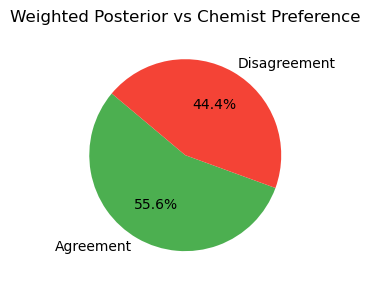

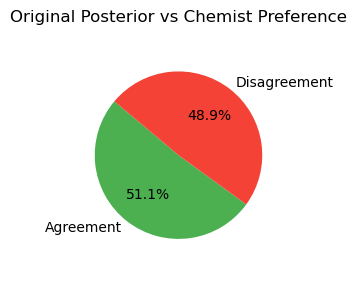

In [154]:
import matplotlib.pyplot as plt

# --- Function to plot agreement pie chart ---
def plot_agreement_pie(column_name, title):
    counts = result_df[column_name].value_counts(dropna=True)
    labels = ['Agreement', 'Disagreement']
    sizes = [counts.get(True, 0), counts.get(False, 0)]
    colors = ['#4CAF50', '#F44336']

    plt.figure(figsize=(3, 3))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(title)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# --- Plot for Weighted Posterior Match ---
plot_agreement_pie("Weighted Pref = Chemist Pref?", "Weighted Posterior vs Chemist Preference")

# --- Plot for Original Posterior Match ---
plot_agreement_pie("Original AIF = Chemist Pref?",  "Original Posterior vs Chemist Preference")

In [111]:
# Create a copy to avoid modifying original
df_change_analysis = result_df.copy()

# Label agreement transitions
def classify_change(row):
    changed = row["Changed Top Interpretation?"]
    orig_agree = row["Original AIF = Chemist Pref?"]
    new_agree = row["Weighted Pref = Chemist Pref?"]

    if not changed:
        return "Unchanged"
    elif not orig_agree and new_agree:
        return "🟢 Gained Agreement"
    elif orig_agree and not new_agree:
        return "🔴 Lost Agreement"
    elif orig_agree and new_agree:
        return "🟡 Still Agreed"
    else:
        return "⚪ Still Disagreed"

df_change_analysis["Agreement Change"] = df_change_analysis.apply(classify_change, axis=1)

# Count and percentage
summary_counts = df_change_analysis["Agreement Change"].value_counts()
summary_percent = (summary_counts / len(df_change_analysis) * 100).round(1)

# Combine into a summary DataFrame
summary_df = pd.DataFrame({
    "Count": summary_counts,
    "Percentage": summary_percent.astype(str) + "%"
})

print("📊 Agreement Change Summary:\n")
print(summary_df)

# Filter for detailed view
affected_df = df_change_analysis[df_change_analysis["Agreement Change"].isin(["🟢 Gained Agreement", "🔴 Lost Agreement"])]
print("\n🧾 Affected TRI Samples (Gained or Lost Agreement):")
affected_df[["TRI", "Chemist Preference", "Original Best AIF", "Weighted Top Interpretation", "Agreement Change"]]

📊 Agreement Change Summary:

                    Count Percentage
Agreement Change                    
Unchanged              15      33.3%
🟢 Gained Agreement     11      24.4%
🔴 Lost Agreement        8      17.8%
🟡 Still Agreed          6      13.3%
⚪ Still Disagreed       5      11.1%

🧾 Affected TRI Samples (Gained or Lost Agreement):


,TRI,Chemist Preference,Original Best AIF,Weighted Top Interpretation,Agreement Change
0,TRI_27,B,I_2,I_1,🟢 Gained Agreement
2,TRI_31,A,I_4,I_1,🔴 Lost Agreement
3,TRI_32,B,I_3,I_1,🔴 Lost Agreement
9,TRI_78,B,I_2,I_1,🟢 Gained Agreement
10,TRI_79,A,I_4,I_1,🟢 Gained Agreement
11,TRI_80,A,I_3,I_1,🟢 Gained Agreement
12,TRI_81,A,I_2,I_1,🔴 Lost Agreement
19,TRI_92,A,I_3,I_1,🟢 Gained Agreement
21,TRI_99,A,I_11,I_1,🔴 Lost Agreement
22,TRI_100,A,I_3,I_1,🟢 Gained Agreement


In [144]:
# --- Extra: Print TRI names for gained/lost agreement ---
gained = affected_df[affected_df["Agreement Change"] == "🟢 Gained Agreement"]
lost = affected_df[affected_df["Agreement Change"] == "🔴 Lost Agreement"]

print("\n✅ TRI samples that GAINED agreement:")
print(gained["TRI"].tolist())

print("\n❌ TRI samples that LOST agreement:")
print(lost["TRI"].tolist())


✅ TRI samples that GAINED agreement:
['TRI_27', 'TRI_78', 'TRI_79', 'TRI_80', 'TRI_92', 'TRI_100', 'TRI_101', 'TRI_102', 'TRI_105', 'TRI_130', 'TRI_194']

❌ TRI samples that LOST agreement:
['TRI_31', 'TRI_32', 'TRI_81', 'TRI_99', 'TRI_106', 'TRI_172', 'TRI_184', 'TRI_186']


In [145]:
# Filter result_df for only the samples that lost agreement
lost_tris = lost["TRI"].tolist()
lost_only_df = result_df[result_df["TRI"].isin(lost_tris)]

# Display the filtered DataFrame
print("\n🔍 Details for TRI samples that LOST agreement:")
lost_only_df


🔍 Details for TRI samples that LOST agreement:


,TRI,Original Best AIF,Chemist Preference,Interpretation A,Score A,Interpretation B,Score B,Chemist Preference (Ix),Weighted Top Interpretation,Changed Top Interpretation?,Weighted Pref = Chemist Pref?,Original AIF = Chemist Pref?
2,TRI_31,I_4,A,AIF,1.0,DARA,1.0,I_4,I_1,True,False,True
3,TRI_32,I_3,B,DARA,1.0,AIF,1.0,I_3,I_1,True,False,True
12,TRI_81,I_2,A,AIF,1.0,DARA,1.0,I_2,I_1,True,False,True
21,TRI_99,I_11,A,AIF,1.0,DARA,1.0,I_11,I_1,True,False,True
28,TRI_106,I_4,A,AIF,0.5,DARA,0.0,I_4,I_1,True,False,True
32,TRI_172,I_7,B,DARA,1.0,AIF,1.0,I_7,I_5,True,False,True
37,TRI_184,I_7,A,AIF,0.5,DARA,0.5,I_7,I_3,True,False,True
39,TRI_186,I_5,B,DARA,1.0,AIF,1.0,I_5,I_1,True,False,True


In [146]:
# Filter for TRI samples where chemist selected "neither A nor B"
neither_df = result_df[result_df["Chemist Preference"] == "neither A nor B"]

# Display them
print("\n🚫 TRI samples where the chemist selected 'neither A nor B':")
neither_df


🚫 TRI samples where the chemist selected 'neither A nor B':


,TRI,Original Best AIF,Chemist Preference,Interpretation A,Score A,Interpretation B,Score B,Chemist Preference (Ix),Weighted Top Interpretation,Changed Top Interpretation?,Weighted Pref = Chemist Pref?,Original AIF = Chemist Pref?
4,TRI_38,I_2,neither A nor B,DARA,1.0,AIF,1.0,neither,I_1,True,False,False
13,TRI_82,I_3,neither A nor B,AIF,0.5,DARA,0.5,neither,I_1,True,False,False
15,TRI_84,I_3,neither A nor B,AIF,1.0,DARA,1.0,neither,I_3,False,False,False
29,TRI_112,I_4,neither A nor B,AIF,0.0,DARA,0.0,neither,I_4,False,False,False
30,TRI_113,I_5,neither A nor B,AIF,0.0,DARA,0.0,neither,I_5,False,False,False
34,TRI_181,I_8,neither A nor B,AIF,0.0,DARA,0.0,neither,I_24,True,False,False
40,TRI_189,I_3,neither A nor B,DARA,0.5,AIF,0.5,neither,I_1,True,False,False


In [147]:
# --- Total number of evaluated samples ---
total_samples = len(result_df)

# --- Count agreements ---
original_agree_count = result_df["Original AIF = Chemist Pref?"].sum()
weighted_agree_count = result_df["Weighted Pref = Chemist Pref?"].sum()

# --- Compute percentages ---
original_pct = (original_agree_count / total_samples) * 100
weighted_pct = (weighted_agree_count / total_samples) * 100

# --- Print summary ---
print(f"✅ Agreed with Chemist (Original Posterior): {original_agree_count} / {total_samples} = {original_pct:.1f}%")
print(f"✅ Agreed with Chemist (Weighted Posterior): {weighted_agree_count} / {total_samples} = {weighted_pct:.1f}%")
print(f"📊 Total Evaluated Samples: {total_samples}")

✅ Agreed with Chemist (Original Posterior): 23 / 45 = 51.1%
✅ Agreed with Chemist (Weighted Posterior): 26 / 45 = 57.8%
📊 Total Evaluated Samples: 45


In [148]:

result_df["Dara Pref = Chemist Pref?"] = result_df.apply(
    lambda row: matches_chemist_pref("I_1", row["Chemist Preference (Ix)"]),
    axis=1
)
result_df

,TRI,Original Best AIF,Chemist Preference,Interpretation A,Score A,Interpretation B,Score B,Chemist Preference (Ix),Weighted Top Interpretation,Changed Top Interpretation?,Weighted Pref = Chemist Pref?,Original AIF = Chemist Pref?,Dara Pref = Chemist Pref?
0,TRI_27,I_2,B,AIF,0.0,DARA,1.0,I_1,I_1,True,True,False,True
1,TRI_28,I_13,A,DARA,1.0,AIF,0.5,I_1,I_2,True,False,False,True
2,TRI_31,I_4,A,AIF,1.0,DARA,1.0,I_4,I_1,True,False,True,False
3,TRI_32,I_3,B,DARA,1.0,AIF,1.0,I_3,I_1,True,False,True,False
4,TRI_38,I_2,neither A nor B,DARA,1.0,AIF,1.0,neither,I_1,True,False,False,False
5,TRI_39,I_2,A,AIF,1.0,DARA,1.0,I_2,I_2,False,True,True,False
6,TRI_62,I_3,both A & B,AIF,1.0,DARA,1.0,I_1 & I_3,I_1,True,True,True,True
7,TRI_63,I_3,both A & B,AIF,1.0,DARA,1.0,I_1 & I_3,I_3,False,True,True,True
8,TRI_64,I_2,both A & B,DARA,1.0,AIF,1.0,I_1 & I_2,I_1,True,True,True,True
9,TRI_78,I_2,B,AIF,1.0,DARA,1.0,I_1,I_1,True,True,False,True


In [155]:
import matplotlib.pyplot as plt

def summarize_and_plot_preferences2(result_df, plot_title="Chemist Preferences (Weighted AIF vs I_1 DARA)"):
    """
    Fixes overcounting by assigning each evaluation to a mutually exclusive category:
    - AIF: chemist agrees with weighted AIF only
    - DARA: chemist agrees with DARA only
    - Both: chemist preferred both A & B
    - Neither: chemist preferred neither
    """

    # Ensure necessary columns exist
    required_cols = [
        "Weighted Pref = Chemist Pref?",
        "Original AIF = Chemist Pref?",
        "Chemist Preference"
    ]
    for col in required_cols:
        if col not in result_df.columns:
            raise ValueError(f"Missing required column: {col}")

    def resolve_category(row):
        is_aif_match = row["Weighted Pref = Chemist Pref?"]
        is_dara_match = row["Dara Pref = Chemist Pref?"]
        chem_pref = row["Chemist Preference"]

        
        if chem_pref == "neither A nor B":
            return ["Neither"]

        labels = []
        if is_aif_match:
            labels.append("AIF")
        if is_dara_match:
            labels.append("DARA")
        # if chem_pref == "both A & B":
        #     labels.append("AIF")
        #     labels.append("DARA")

        return labels if labels else ["Unresolved"]

    # Apply it
    result_df["Resolved Category"] = result_df.apply(resolve_category, axis=1)

    # Explode so each row-category pair is separate
    exploded = result_df.explode("Resolved Category")

    # Count
    summary_counts = exploded["Resolved Category"].value_counts()
    total = len(result_df)  # Total number of samples

    # Display
    print(f"Total evaluations: {total}")
    for label in ["AIF", "DARA", "Neither"]:
        count = summary_counts.get(label, 0)
        pct = count / total * 100
        print(f"{label}: {count} ({pct:.1f}%)")

    # Optional: plot
    import matplotlib.pyplot as plt

    labels = ["AIF", "DARA",  "Neither"]
    counts = [summary_counts.get(label, 0) for label in labels]
    percentages = [c / total * 100 for c in counts]

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, percentages, color=["#4CAF50", "#2196F3", "#F44336"], edgecolor="black")

    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{pct:.1f}%", ha="center", va="bottom", fontsize=11)

    ax.set_ylim(0, max(percentages) + 10)
    ax.set_ylabel("Percentage of Preferences")
    ax.set_title("Chemist Preferences: Independent Category Matches")
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

    # Build return dict safely from counts
    return {
        "AIF": int(summary_counts.get("AIF", 0)),
        "DARA": int(summary_counts.get("DARA", 0)),
        "Both": int(summary_counts.get("Both", 0)),
        "Neither": int(summary_counts.get("Neither", 0)),
        "Total (Samples)": int(total)
    }
# Usage:
# Usage:
summary = summarize_and_plot_preferences2(result_df)

KeyError: 'Dara Pref = Chemist Pref?'

Total evaluations: 45
AIF: 17 (37.8%)
DARA: 15 (33.3%)
Both: 9 (20.0%)
Neither: 7 (15.6%)


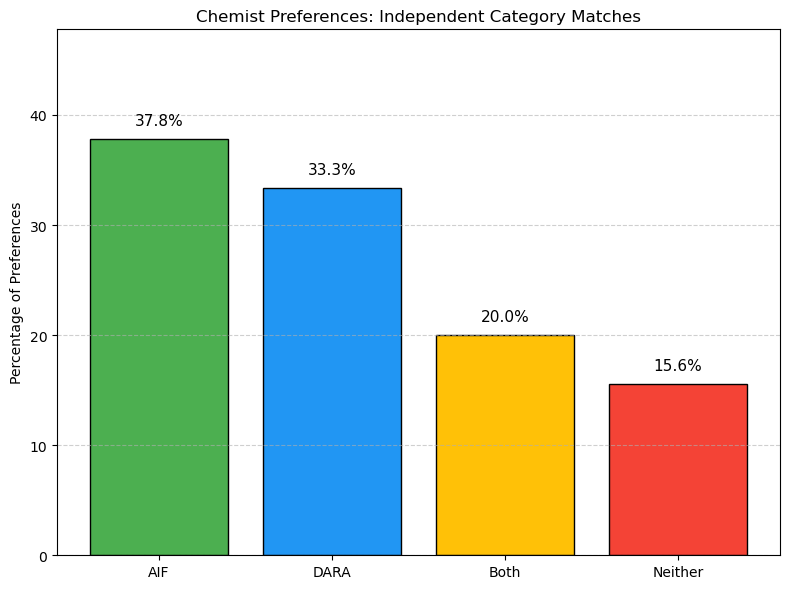

In [150]:
import matplotlib.pyplot as plt

def summarize_and_plot_preferences(result_df, plot_title="Chemist Preferences (Weighted AIF vs I_1 DARA)"):
    """
    Fixes overcounting by assigning each evaluation to a mutually exclusive category:
    - AIF: chemist agrees with weighted AIF only
    - DARA: chemist agrees with DARA only
    - Both: chemist preferred both A & B
    - Neither: chemist preferred neither
    """

    # Ensure necessary columns exist
    required_cols = [
        "Weighted Pref = Chemist Pref?",
        "Original AIF = Chemist Pref?",
        "Chemist Preference"
    ]
    for col in required_cols:
        if col not in result_df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Assign exclusive categories
    # def resolve_category(row):
    #     if row["Chemist Preference"] == "both A & B":
    #         return "Both"
    #     elif row["Chemist Preference"] == "neither A nor B":
    #         return "Neither"
    #     elif row["Weighted Pref = Chemist Pref?"]:
    #         return "AIF"
    #     elif row["Dara Pref = Chemist Pref?"]:
    #         return "DARA"
    #     else:
    #         return "Unresolved"
    def resolve_category(row):
        is_aif_match = row["Weighted Pref = Chemist Pref?"]
        is_dara_match = row["Dara Pref = Chemist Pref?"]
        chem_pref = row["Chemist Preference"]

        if chem_pref == "both A & B":
            return ["Both"]
        elif chem_pref == "neither A nor B":
            return ["Neither"]

        labels = []
        if is_aif_match:
            labels.append("AIF")
        if is_dara_match:
            labels.append("DARA")

        return labels if labels else ["Unresolved"]

    # Apply it
    result_df["Resolved Category"] = result_df.apply(resolve_category, axis=1)

    # Explode so each row-category pair is separate
    exploded = result_df.explode("Resolved Category")

    # Count
    summary_counts = exploded["Resolved Category"].value_counts()
    total = len(result_df)  # Total number of samples

    # Display
    print(f"Total evaluations: {total}")
    for label in ["AIF", "DARA", "Both", "Neither"]:
        count = summary_counts.get(label, 0)
        pct = count / total * 100
        print(f"{label}: {count} ({pct:.1f}%)")

    # Optional: plot
    import matplotlib.pyplot as plt

    labels = ["AIF", "DARA", "Both", "Neither"]
    counts = [summary_counts.get(label, 0) for label in labels]
    percentages = [c / total * 100 for c in counts]

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, percentages, color=["#4CAF50", "#2196F3", "#FFC107", "#F44336"], edgecolor="black")

    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{pct:.1f}%", ha="center", va="bottom", fontsize=11)

    ax.set_ylim(0, max(percentages) + 10)
    ax.set_ylabel("Percentage of Preferences")
    ax.set_title("Chemist Preferences: Independent Category Matches")
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

    # Build return dict safely from counts
    return {
        "AIF": int(summary_counts.get("AIF", 0)),
        "DARA": int(summary_counts.get("DARA", 0)),
        "Both": int(summary_counts.get("Both", 0)),
        "Neither": int(summary_counts.get("Neither", 0)),
        "Total (Samples)": int(total)
    }
# Usage:
summary = summarize_and_plot_preferences(result_df)

# Weights and impact 

In [151]:
# Check the impact of different combinations of weights, on the chemist agreement 
import json
import pandas as pd
from itertools import product

# --- Load interpretation files ---
# with open("../src/interpretations_new.json", "r") as f:
#     interpretations_default = json.load(f)
# with open("../src/interpretations_new_with_weighted_posteriors.json", "r") as f:
#     interpretations_new = json.load(f)
# with open("../src/interpretations_llm_flat_with_weighted_posteriors.json", "r") as f:
#     interpretations_llm = json.load(f)


with open("../src/interpretations_new_llm_approach_May7_flat_with_weighted.json", "r") as f:
    interpretations_default = json.load(f)
    # interpretations_new = json.load(f)
    # interpretations_llm = json.load(f)

# --- Load evaluation and mapping ---
evaluation_df = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_evaluation.csv")
mapping_df = pd.read_csv("../data/alab_synthesis_data/AIFvsDara_LOG_updated.csv")
evaluation_df = evaluation_df[~evaluation_df["Run Name in ALAB"].str.contains("15")]
evaluation_df = evaluation_df.dropna(subset=["Prefered Interpretation"])

# --- Sample-specific routing ---
use_new_samples =[]# ["TRI_130", "TRI_197"]
use_llm_samples = []#["TRI_182"]

def normalize_key(name):
    return name.strip().replace("-", "_")

def get_sample(tri_key):
    if tri_key in use_new_samples:
        return interpretations_new.get(tri_key, {})
    elif tri_key in use_llm_samples:
        return interpretations_llm.get(tri_key, {})
    else:
        return interpretations_default.get(tri_key, {})

def matches_chemist_pref(selected_ix, chemist_ix):
    if pd.isna(chemist_ix) or pd.isna(selected_ix):
        return False
    if "&" in str(chemist_ix):
        return selected_ix in chemist_ix.split(" & ")
    return selected_ix == chemist_ix

# --- Grid search setup ---
weight_range = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
grid_results = []

for w_llm, w_bs, w_rwp, w_score in product(weight_range, repeat=4):
    if w_llm + w_bs == 0 or w_rwp + w_score == 0:
        continue  # avoid division by zero

    agreements = 0
    total = 0

    for _, row in evaluation_df.iterrows():
        run_name = row["Run Name in ALAB"]
        tri_key = normalize_key(run_name)
        chemist_pref = row["Prefered Interpretation"]

        mapping_row = mapping_df[mapping_df["Run Name in ALAB"] == run_name]
        if mapping_row.empty:
            continue

        explanation_a = mapping_row.iloc[0]["Interpr A - explanation"]
        a_label, b_label = ("AIF", "DARA") if explanation_a == "AIF interpretation" else ("DARA", "AIF")

        sample = get_sample(tri_key)
        if not sample or "I_1" not in sample:
            continue

        aif_candidates = {k: v for k, v in sample.items() if k != "I_1"}
        if not aif_candidates:
            continue

        if chemist_pref == "A":
            chem_pref_ix = "I_1" if a_label == "DARA" else max(aif_candidates, key=lambda k: sample[k].get("posterior_probability", -1))
        elif chemist_pref == "B":
            chem_pref_ix = max(aif_candidates, key=lambda k: sample[k].get("posterior_probability", -1)) if b_label == "AIF" else "I_1"
        elif chemist_pref == "both A & B":
            chem_pref_ix = "I_1 & " + max(aif_candidates, key=lambda k: sample[k].get("posterior_probability", -1))
        else:
            chem_pref_ix = "neither"

        # Compute weighted posteriors
        weighted_posteriors = {}
        for name, data in sample.items():
            llm = data.get("LLM_interpretation_likelihood", 0)
            bs = data.get("balance_score", 0)
            rwp = data.get("normalized_rwp", 0)
            score = data.get("normalized_score", 0)
            weighted_prior = (w_llm * llm + w_bs * bs) / (w_llm + w_bs)
            weighted_fit = (w_rwp * rwp + w_score * score) / (w_rwp + w_score)
            weighted_posteriors[name] = weighted_prior * weighted_fit

        total_weighted = sum(weighted_posteriors.values())
        if total_weighted > 0:
            for k in weighted_posteriors:
                weighted_posteriors[k] /= total_weighted

        top_weighted = max(weighted_posteriors.items(), key=lambda x: x[1])[0]

        if matches_chemist_pref(top_weighted, chem_pref_ix):
            agreements += 1
        total += 1

    agreement_ratio = agreements / total * 100 if total > 0 else 0
    grid_results.append({
        "w_llm": w_llm,
        "w_bs": w_bs,
        "w_rwp": w_rwp,
        "w_score": w_score,
        "Agreement %": round(agreement_ratio, 2)
    })

# --- Output results ---
grid_df = pd.DataFrame(grid_results)
grid_df_sorted = grid_df.sort_values(by="Agreement %", ascending=False)
pd.set_option("display.max_rows", None)
grid_df_sorted.head(20)

# Optional: Save
# grid_df_sorted.to_csv("grid_agreement_results.csv", index=False)

,w_llm,w_bs,w_rwp,w_score,Agreement %
311,0.2,0.6,1.0,0.4,68.89
536,0.4,0.8,0.4,0.0,66.67
588,0.4,1.0,0.8,1.0,66.67
267,0.2,0.4,0.6,1.0,66.67
264,0.2,0.4,0.6,0.4,66.67
262,0.2,0.4,0.6,0.0,66.67
261,0.2,0.4,0.4,1.0,66.67
594,0.4,1.0,1.0,1.0,66.67
260,0.2,0.4,0.4,0.8,66.67
591,0.4,1.0,1.0,0.4,66.67


In [131]:
# Filter for cases where w_bs = 1 and w_score = 1
filtered_top = grid_df_sorted[
    (grid_df_sorted["w_bs"] == 1) & (grid_df_sorted["w_"] == 1)
]

# Display the top results sorted by Agreement %
filtered_top_sorted = filtered_top.sort_values(by="Agreement %", ascending=False)
print("🔝 Top agreements where w_bs = w_score = 1:")
filtered_top_sorted.head(2)

🔝 Top agreements where w_bs = w_score = 1:


,w_llm,w_bs,w_rwp,w_score,Agreement %
1202,1.0,1.0,0.4,0.2,64.44
1222,1.0,1.0,1.0,0.6,64.44


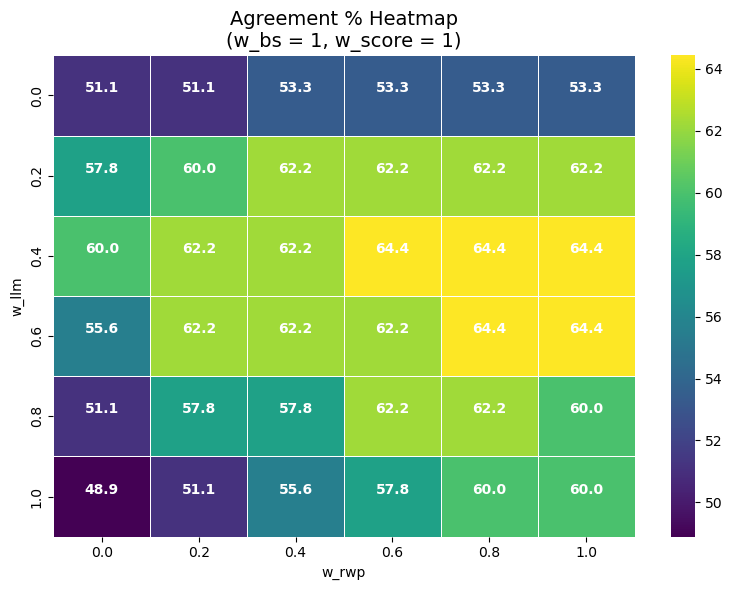

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Filter for w_bs = 1 and w_score = 1 ---
filtered_df = grid_df_sorted[
    (grid_df_sorted["w_bs"] == 1.0) & (grid_df_sorted["w_score"] == 1.0)
]

# Pivot for heatmap
heatmap_data = filtered_df.pivot_table(
    index="w_llm",
    columns="w_rwp",
    values="Agreement %",
    aggfunc="mean"
).sort_index(ascending=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=False,  # We will add our own annotations
    fmt=".1f",
    cmap="viridis",
    linewidths=0.5,
    linecolor='white'
)

# Add annotations manually above each cell
for y in range(heatmap_data.shape[0]):
    for x in range(heatmap_data.shape[1]):
        value = heatmap_data.iloc[y, x]
        if pd.notna(value):
            ax.text(
                x + 0.5, y + 0.5,  # adjust vertical offset
                f"{value:.1f}",
                ha='center', va='bottom',
                fontsize=10,
                color='white',
                weight='bold'
            )

plt.title("Agreement % Heatmap\n(w_bs = 1, w_score = 1)", fontsize=14)
plt.xlabel("w_rwp")
plt.ylabel("w_llm")
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


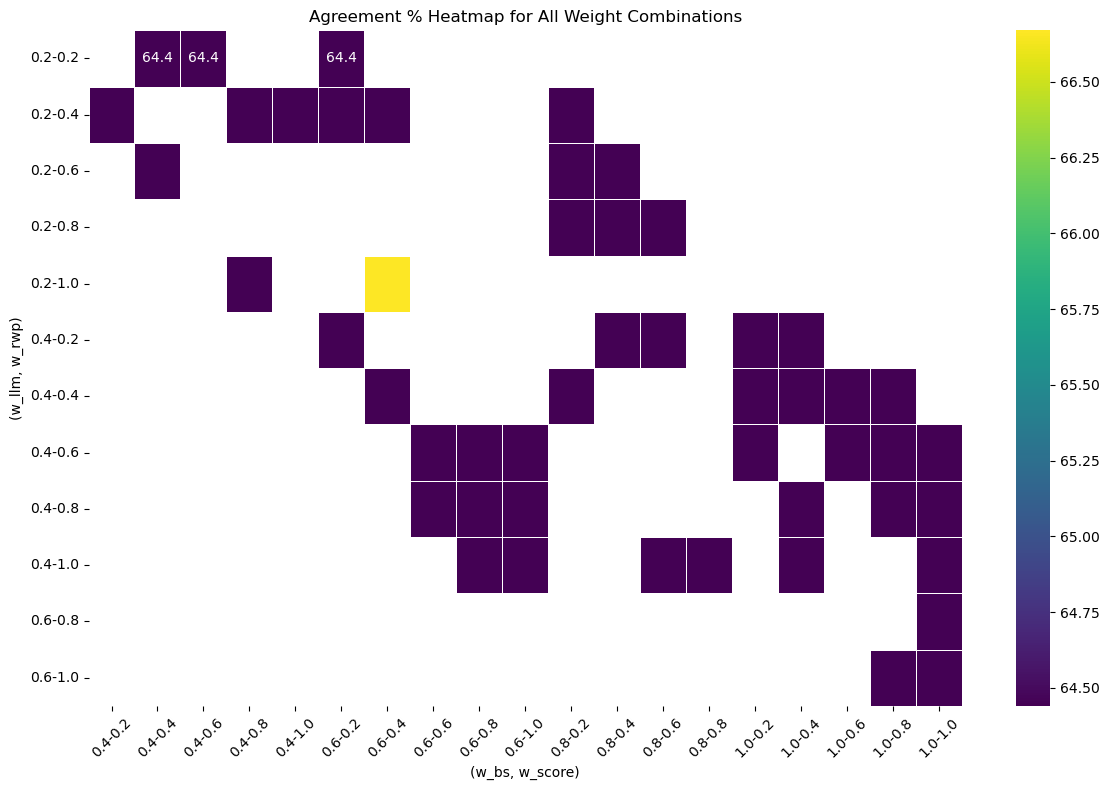

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pivot table: index as (w_llm, w_rwp), columns as (w_bs, w_score), or vice versa depending on layout preference
grid_df_sorted_head = grid_df_sorted.head(50)
pivot = grid_df_sorted_head.pivot_table(
    index=["w_llm", "w_rwp"],
    columns=["w_bs", "w_score"],
    values="Agreement %",
    aggfunc="mean"
)

# Plot heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    pivot,
    annot=True,
    fmt=".1f",
    cmap="viridis",
    linewidths=0.5,
    linecolor="white"
)

plt.title("Agreement % Heatmap for All Weight Combinations")
plt.xlabel("(w_bs, w_score)")
plt.ylabel("(w_llm, w_rwp)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# getting the weights all together

In [257]:
import json
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

# --- Load interpretation sources ---
with open("../src/interpretations_new.json", "r") as f:
    interpretations_default = json.load(f)

with open("../src/interpretations_new.json", "r") as f:
    interpretations_new = json.load(f)

with open("../src/interpretations_llm_flat.json", "r") as f:
    interpretations_llm = json.load(f)


# --- Load interpretation files ---
with open("../src/interpretations_new.json", "r") as f:
    interpretations_default = json.load(f)
with open("../src/interpretations_new_with_weighted_posteriors.json", "r") as f:
    interpretations_new = json.load(f)
with open("../src/interpretations_llm_flat_with_weighted_posteriors.json", "r") as f:
    interpretations_llm = json.load(f)

# --- Define sample-specific source routing ---
use_new_samples = ["TRI_130", "TRI_197"]
use_llm_samples = ["TRI_182"]

def normalize_key(name):
    return name.strip().replace("-", "_")

def get_sample(tri_key):
    if tri_key in use_new_samples:
        return interpretations_new.get(tri_key, {})
    elif tri_key in use_llm_samples:
        return interpretations_llm.get(tri_key, {})
    else:
        return interpretations_default.get(tri_key, {})

# --- Load data ---
mapping_df = pd.read_csv("../data/alab_synthesis_data/AIFvsDara_LOG_updated.csv")
evaluation_df = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_evaluation.csv")
evaluation_df = evaluation_df[~evaluation_df["Run Name in ALAB"].str.contains("15")]
evaluation_df = evaluation_df.dropna(subset=[
    "Interpretation A: Human Evaluation (0-1, 1 is best)",
    "Interpretation B: Human Evaluation"
])

# --- Helper functions ---
def normalize_chemist_score(score):
    return score * 100

def llm_to_evaluation_score(llm_value):
    if llm_value is None:
        return 0.0
    elif llm_value < 0.45:
        return 0.0
    elif llm_value < 0.55:
        return 0.5
    else:
        return 1.0

# --- Collect rows for optimization ---
prior_rows = []
x_rows = []

for _, eval_row in evaluation_df.iterrows():
    run_name = eval_row["Run Name in ALAB"]
    tri_key = normalize_key(run_name)

    mapping_row = mapping_df[mapping_df["Run Name in ALAB"] == run_name]
    if mapping_row.empty:
        continue

    explanation_a = mapping_row.iloc[0]["Interpr A - explanation"]
    sample = get_sample(tri_key)
    if not sample or "I_1" not in sample:
        continue

    interp_dara = sample["I_1"]
    aif_candidates = {k: v for k, v in sample.items() if k.startswith("I_") and k != "I_1"}
    if not aif_candidates:
        continue

    best_aif_key = max(aif_candidates, key=lambda k: aif_candidates[k].get("posterior_probability", 0))
    interp_aif = aif_candidates[best_aif_key]

    if explanation_a == "AIF interpretation":
        interp_a, interp_b = interp_aif, interp_dara
    elif explanation_a == "Dara interpretation":
        interp_a, interp_b = interp_dara, interp_aif
    else:
        continue

    chemist_score_a = normalize_chemist_score(eval_row["Interpretation A: Human Evaluation (0-1, 1 is best)"])
    chemist_score_b = normalize_chemist_score(eval_row["Interpretation B: Human Evaluation"])

    for interp, score in [(interp_a, chemist_score_a), (interp_b, chemist_score_b)]:
        prior_rows.append({
            "LLM_eval": interp.get("LLM_interpretation_likelihood", 0),
            "Balance": interp.get("balance_score", 0),
            "Chemist": score
        })
        x_rows.append({
            "RWP": interp.get("normalized_rwp", 0),
            "PeakMatch": interp.get("normalized_score", 0),
            "Chemist": score
        })

# --- Create DataFrames ---
prior_df = pd.DataFrame(prior_rows)
x_df = pd.DataFrame(x_rows)

# --- Define optimization functions ---
def optimize_prior(weights):
    w_llm, w_balance = weights
    prior = (w_llm * prior_df["LLM_eval"] + w_balance * prior_df["Balance"]) / (w_llm + w_balance + 1e-8)
    return mean_squared_error(prior_df["Chemist"], prior * 100)

def optimize_x(weights):
    w_rwp, w_peak = weights
    x = (w_rwp * x_df["RWP"] + w_peak * x_df["PeakMatch"]) / (w_rwp + w_peak + 1e-8)
    return mean_squared_error(x_df["Chemist"], x * 100)

# --- Run optimizations ---
res_prior = minimize(optimize_prior, [1.0, 1.0], method='Nelder-Mead', bounds=[(0, 1), (0, 1)])
res_x = minimize(optimize_x, [1.0, 1.0], method='Nelder-Mead', bounds=[(0, 1), (0, 1)])

# --- Print results ---
print("For Nelder-Mead method")
print("✅ Optimized Prior Weights:")
print(f"  LLM_eval weight:     {res_prior.x[0]:.4f}")
print(f"  Balance score weight:{res_prior.x[1]:.4f}")

print("\n✅ Optimized X (Fit Quality) Weights:")
print(f"  RWP weight:          {res_x.x[0]:.4f}")
print(f"  Peak match weight:   {res_x.x[1]:.4f}")


For Nelder-Mead method
✅ Optimized Prior Weights:
  LLM_eval weight:     0.6174
  Balance score weight:1.0000

✅ Optimized X (Fit Quality) Weights:
  RWP weight:          1.0000
  Peak match weight:   0.6508


In [260]:
from sklearn.metrics import mean_squared_error

def evaluate_custom_weights(w_llm, w_bs, w_rwp, w_score):
    total_predictions = []
    total_targets = []

    for _, eval_row in evaluation_df.iterrows():
        run_name = eval_row["Run Name in ALAB"]
        tri_key = normalize_key(run_name)
        mapping_row = mapping_df[mapping_df["Run Name in ALAB"] == run_name]
        if mapping_row.empty:
            continue

        explanation_a = mapping_row.iloc[0]["Interpr A - explanation"]
        sample = get_sample(tri_key)
        if not sample or "I_1" not in sample:
            continue

        interp_dara = sample["I_1"]
        aif_candidates = {k: v for k, v in sample.items() if k != "I_1"}
        if not aif_candidates:
            continue

        best_aif_key = max(aif_candidates, key=lambda k: sample[k].get("posterior_probability", 0))
        interp_aif = sample[best_aif_key]

        interp_a, interp_b = (interp_aif, interp_dara) if explanation_a == "AIF interpretation" else (interp_dara, interp_aif)

        chem_score_a = normalize_chemist_score(eval_row["Interpretation A: Human Evaluation (0-1, 1 is best)"])
        chem_score_b = normalize_chemist_score(eval_row["Interpretation B: Human Evaluation"])

        for interp, target_score in [(interp_a, chem_score_a), (interp_b, chem_score_b)]:
            llm_eval = interp.get("LLM_interpretation_likelihood", 0)
            bs = interp.get("balance_score", 0)
            rwp = interp.get("normalized_rwp", 0)
            score = interp.get("normalized_score", 0)

            prior = (w_llm * llm_eval + w_bs * bs) / (w_llm + w_bs + 1e-8)
            x = (w_rwp * rwp + w_score * score) / (w_rwp + w_score + 1e-8)
            posterior = prior * x * 100  # same scale as chemist score

            total_predictions.append(posterior)
            total_targets.append(target_score)

    mse = mean_squared_error(total_targets, total_predictions)
    return mse

mse = evaluate_custom_weights(0.6174, 1, 1, 0.6508)
print(f"MSE for [0.6174, 1, 1, 0.6508]: {mse:.2f}")

mse = evaluate_custom_weights(0.4, 1, 0.5, 1)
print(f"MSE for [0.4, 1, 0.5, 1]: {mse:.2f}")


mse = evaluate_custom_weights(0.4, 1, 0.4, 1)
print(f"MSE for [0.4, 1, 0.4, 1]: {mse:.2f}")

mse = evaluate_custom_weights(0.4, 1, 0.6, 1)
print(f"MSE for [0.4, 1, 0.6, 1]: {mse:.2f}")

MSE for [0.6174, 1, 1, 0.6508]: 1244.15
MSE for [0.4, 1, 0.5, 1]: 1213.03
MSE for [0.4, 1, 0.4, 1]: 1231.14
MSE for [0.4, 1, 0.6, 1]: 1198.20


In [3]:
# --- Helper Functions ---
def normalize_chemist_score(score):
    return score * 100

def llm_to_evaluation_score(llm_value):
    if llm_value is None:
        return 0.0
    if llm_value < 0.45:
        return 0.0
    elif 0.45 <= llm_value < 0.55:
        return 0.5
    else:
        return 1.0

def calculate_prior(llm_eval_score, balance_score, llm_weight, balance_weight):
    total_weight = llm_weight + balance_weight
    return 0.0 if total_weight == 0 else (llm_weight * llm_eval_score + balance_weight * balance_score) / total_weight

def calculate_x(normalized_rwp, normalized_score, rwp_weight, peakmatch_weight):
    total_weight = rwp_weight + peakmatch_weight
    return 0.0 if total_weight == 0 else (rwp_weight * normalized_rwp + peakmatch_weight * normalized_score) / total_weight

def calculate_posterior(prior, x):
    return prior * x

# --- Global tracker ---
best_error_so_far = [float('inf')]

# --- Objective Function ---
def objective(weights):
    llm_weight, balance_weight, rwp_weight, peakmatch_weight = weights
    total_error = 0
    total_samples = 0

    for _, eval_row in evaluation_df.iterrows():
        tri_name = normalize_key(eval_row["Run Name in ALAB"])
        mapping_row = mapping_df[mapping_df["Run Name in ALAB"] == eval_row["Run Name in ALAB"]]
        if mapping_row.empty:
            continue

        explanation_a = mapping_row.iloc[0]["Interpr A - explanation"]
        interpretations = get_sample(tri_name)
        if not interpretations or "I_1" not in interpretations:
            continue

        interp_dara = interpretations["I_1"]
        aif_candidates = {k: v for k, v in interpretations.items() if k.startswith("I_") and k != "I_1"}
        if not aif_candidates:
            continue

        best_aif_key = max(aif_candidates, key=lambda k: aif_candidates[k].get("posterior_probability", 0))
        interp_aif = aif_candidates[best_aif_key]

        if explanation_a == "AIF interpretation":
            interp_a, interp_b = interp_aif, interp_dara
        elif explanation_a == "Dara interpretation":
            interp_a, interp_b = interp_dara, interp_aif
        else:
            continue

        llm_eval_a = llm_to_evaluation_score(interp_a.get("LLM_interpretation_likelihood", 0))
        prior_a = calculate_prior(llm_eval_a, interp_a.get("balance_score", 0), llm_weight, balance_weight)
        x_a = calculate_x(interp_a.get("normalized_rwp", 0), interp_a.get("normalized_score", 0), rwp_weight, peakmatch_weight)
        posterior_a = calculate_posterior(prior_a, x_a) * 100

        llm_eval_b =llm_to_evaluation_score(interp_b.get("LLM_interpretation_likelihood", 0))
        prior_b = calculate_prior(llm_eval_b, interp_b.get("balance_score", 0), llm_weight, balance_weight)
        x_b = calculate_x(interp_b.get("normalized_rwp", 0), interp_b.get("normalized_score", 0), rwp_weight, peakmatch_weight)
        posterior_b = calculate_posterior(prior_b, x_b) * 100

        chemist_score_a = normalize_chemist_score(eval_row["Interpretation A: Human Evaluation (0-1, 1 is best)"])
        chemist_score_b = normalize_chemist_score(eval_row["Interpretation B: Human Evaluation"])
        preferred = eval_row["Prefered Interpretation"]

        total_error += (posterior_a - chemist_score_a) ** 2
        total_error += (posterior_b - chemist_score_b) ** 2
        total_samples += 2

        if preferred == "A" and posterior_a < posterior_b:
            total_error += 50
        elif preferred == "B" and posterior_b < posterior_a:
            total_error += 50
        elif preferred == "neither A nor B":
            if posterior_a > 70 or posterior_b > 70:
                total_error += 50

    return total_error / total_samples if total_samples > 0 else float("inf")

# --- Optimization ---
initial_weights = [1, 1.3, 1.3, 1.3]
bounds = [(0, 1)] * 4
result = minimize(objective, initial_weights, method='Nelder-Mead', bounds=bounds)

# --- Save Results ---
print("\n🏁 Optimized Weights:")
print(f"LLM Weight: {result.x[0]:.4f}")
print(f"Balance Weight: {result.x[1]:.4f}")
print(f"RWP Weight: {result.x[2]:.4f}")
print(f"Peak Match Weight: {result.x[3]:.4f}")

with open("optimized_weights.txt", "w") as f:
    f.write(f"LLM Weight: {result.x[0]:.4f}\n")
    f.write(f"Balance Weight: {result.x[1]:.4f}\n")
    f.write(f"RWP Weight: {result.x[2]:.4f}\n")
    f.write(f"Peak Match Weight: {result.x[3]:.4f}\n")

print("\n✅ Optimization completed and weights saved.")

/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_11677/3726753223.py:92: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(objective, initial_weights, method='Nelder-Mead', bounds=bounds)



🏁 Optimized Weights:
LLM Weight: 0.0000
Balance Weight: 1.0000
RWP Weight: 0.6948
Peak Match Weight: 0.2628

✅ Optimization completed and weights saved.


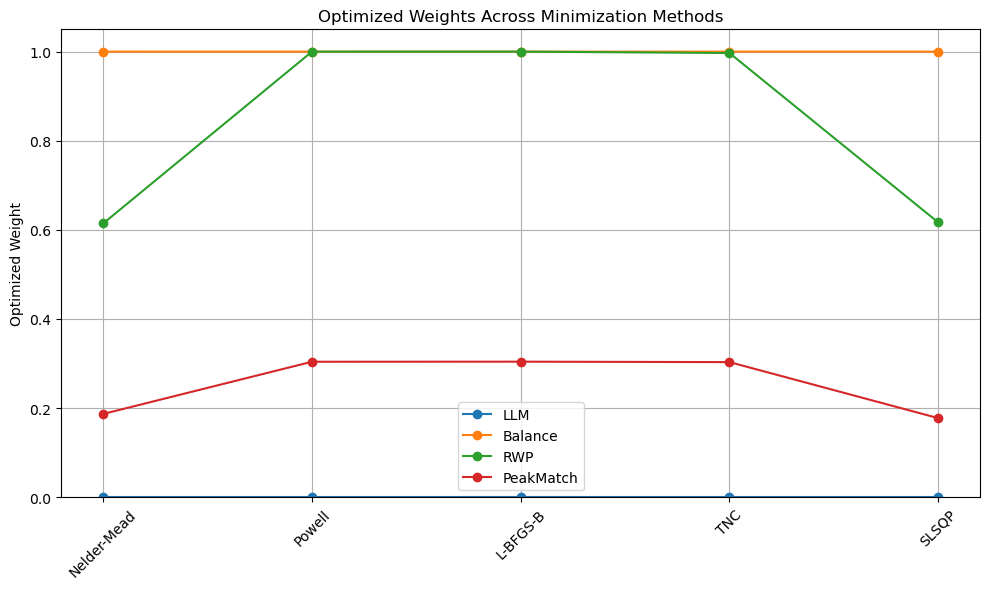

In [87]:
import json
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Load evaluation data
mapping_df = pd.read_csv("../data/alab_synthesis_data/AIFvsDara_LOG_updated.csv")
evaluation_df = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_evaluation.csv")
evaluation_df = evaluation_df[~evaluation_df["Run Name in ALAB"].str.contains("15")]
evaluation_df = evaluation_df.dropna(subset=[
    "Interpretation A: Human Evaluation (0-1, 1 is best)",
    "Interpretation B: Human Evaluation"
])

# Sample source routing
use_new_samples = ["TRI_130", "TRI_197"]
use_llm_samples = ["TRI_182"]

def normalize_key(name):
    return name.strip().replace("-", "_")

def get_sample(tri_key):
    if tri_key in use_new_samples:
        return interpretations_new.get(tri_key, {})
    elif tri_key in use_llm_samples:
        return interpretations_llm.get(tri_key, {})
    else:
        return interpretations_default.get(tri_key, {})

def normalize_chemist_score(score):
    return score * 100

def calculate_prior(llm_eval_score, balance_score, llm_weight, balance_weight):
    total_weight = llm_weight + balance_weight
    return 0.0 if total_weight == 0 else (llm_weight * llm_eval_score + balance_weight * balance_score) / total_weight

def calculate_x(normalized_rwp, normalized_score, rwp_weight, peakmatch_weight):
    total_weight = rwp_weight + peakmatch_weight
    return 0.0 if total_weight == 0 else (rwp_weight * normalized_rwp + peakmatch_weight * normalized_score) / total_weight

def calculate_posterior(prior, x):
    return prior * x

def objective(weights):
    llm_weight, balance_weight, rwp_weight, peakmatch_weight = weights
    total_error = 0
    total_samples = 0

    for _, row in evaluation_df.iterrows():
        tri_key = normalize_key(row["Run Name in ALAB"])
        sample = get_sample(tri_key)
        mapping_row = mapping_df[mapping_df["Run Name in ALAB"] == row["Run Name in ALAB"]]
        if not sample or "I_1" not in sample or mapping_row.empty:
            continue

        explanation_a = mapping_row.iloc[0]["Interpr A - explanation"]
        interp_dara = sample["I_1"]
        aif_candidates = {k: v for k, v in sample.items() if k.startswith("I_") and k != "I_1"}
        if not aif_candidates:
            continue

        best_key = max(aif_candidates, key=lambda k: aif_candidates[k].get("posterior_probability", 0))
        interp_aif = aif_candidates[best_key]

        if explanation_a == "AIF interpretation":
            interp_a, interp_b = interp_aif, interp_dara
        elif explanation_a == "Dara interpretation":
            interp_a, interp_b = interp_dara, interp_aif
        else:
            continue

        def compute_posterior(interp):
            llm = interp.get("LLM_interpretation_likelihood", 0)
            bal = interp.get("balance_score", 0)
            rwp = interp.get("normalized_rwp", 0)
            peak = interp.get("normalized_score", 0)
            return calculate_posterior(calculate_prior(llm, bal, llm_weight, balance_weight),
                                       calculate_x(rwp, peak, rwp_weight, peakmatch_weight)) * 100

        posterior_a = compute_posterior(interp_a)
        posterior_b = compute_posterior(interp_b)

        chemist_score_a = normalize_chemist_score(row["Interpretation A: Human Evaluation (0-1, 1 is best)"])
        chemist_score_b = normalize_chemist_score(row["Interpretation B: Human Evaluation"])
        preferred = row["Prefered Interpretation"]

        total_error += (posterior_a - chemist_score_a) ** 2
        total_error += (posterior_b - chemist_score_b) ** 2
        total_samples += 2

        if preferred == "A" and posterior_a < posterior_b:
            total_error += 50
        elif preferred == "B" and posterior_b < posterior_a:
            total_error += 50
        elif preferred == "neither A nor B":
            if posterior_a > 70 or posterior_b > 70:
                total_error += 50

    return total_error / total_samples if total_samples > 0 else float("inf")

# Run optimization using various methods
methods = ["Nelder-Mead", "Powell", "L-BFGS-B", "TNC", "SLSQP"]
results = []

for method in methods:
    res = minimize(objective, [1.0, 1.0, 1.0, 1.0], method=method, bounds=[(0, 1)] * 4)
    results.append({
        "Method": method,
        "LLM": res.x[0],
        "Balance": res.x[1],
        "RWP": res.x[2],
        "PeakMatch": res.x[3]
    })

# Plot results
df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
for metric in ["LLM", "Balance", "RWP", "PeakMatch"]:
    plt.plot(df["Method"], df[metric], marker='o', label=metric)

plt.ylabel("Optimized Weight")
plt.title("Optimized Weights Across Minimization Methods")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Testing the new weights and how well the new reasults agree with the chemist

In [10]:
import json

def flatten_interpretation_json(input_path, output_path):
    """
    Converts interpretation JSON structure from a list of dicts per TRI key
    into a single nested dict for easier processing.
    
    Parameters:
        input_path (str): Path to the input JSON file.
        output_path (str): Path to save the flattened JSON.
    """
    with open(input_path, "r") as f:
        data = json.load(f)

    flattened = {}
    for tri_key, interps in data.items():
        flattened[tri_key] = {}
        for interp in interps:
            if isinstance(interp, dict):
                flattened[tri_key].update(interp)  # assumes only one key per dict

    with open(output_path, "w") as f:
        json.dump(flattened, f, indent=2)

    print(f"✅ Flattened JSON saved to: {output_path}")
flatten_interpretation_json("../src/interpretations_new_llm_approach_May7.json","../src/interpretations_new_llm_approach_May7_flat.json")

✅ Flattened JSON saved to: ../src/interpretations_new_llm_approach_May7_flat.json


In [11]:
# Step 1 add the new weighted posterior probability to the interpretations
import json
import os

# --- Configuration ---
files = {
    # "interpretations.json": "../src/interpretations.json",
    # "interpretations_new.json": "../src/interpretations_new.json",
    # "interpretations_llm_flat.json": "../src/interpretations_llm_flat.json",
    "interpretations_new_llm_approach_May7_flat.json" : "../src/interpretations_new_llm_approach_May7_flat.json"
}

# === 🔧 Optimization using Nelder-Mead method ===
# ✅ Optimized Prior Weights:
#   LLM_eval weight:      0.6174
#   Balance score weight: 1.0000

# ✅ Optimized X (Fit Quality) Weights:
#   RWP weight:           1.0000
#   Peak match weight:    0.6508

# --- Helper: compute weighted posterior ---
def compute_weighted_posteriors(interpretations, llm_weight=1.0, balance_weight=1.0, rwp_weight=1.0, peakmatch_weight=1.0):
    def calculate_prior(llm_score, balance_score):
        total = llm_weight + balance_weight
        return (llm_weight * llm_score + balance_weight * balance_score) / total if total else 0

    def calculate_x(rwp, peakmatch):
        total = rwp_weight + peakmatch_weight
        return (rwp_weight * rwp + peakmatch_weight * peakmatch) / total if total else 0

    def calculate_posterior(prior, x):
        return prior * x

    for tri_key, tri_interps in interpretations.items():
        joint_probs = {}
        for name, interp in tri_interps.items():
            llm = interp.get("LLM_interpretation_likelihood", 0)
            balance = interp.get("balance_score", 0)
            rwp = interp.get("normalized_rwp", 0)
            peak = interp.get("normalized_score", 0) #old_normalized_score  -> checking if I get the same results if the old version

            prior = calculate_prior(llm, balance)
            x = calculate_x(rwp, peak) #interp.get("old_X", 0)/100# -> checking if I get the same results if the old version
            posterior = calculate_posterior(prior, x)
            joint_probs[name] = posterior

        total = sum(joint_probs.values()) or 1e-8  # prevent division by zero
        for name in tri_interps:
            tri_interps[name]["weighted_posterior_probability"] = joint_probs[name] / total

    return interpretations

# --- Process and Save Each File ---
for label, path in files.items():
    with open(path, "r") as f:
        interpretations = json.load(f)

    # updated = compute_weighted_posteriors(interpretations, llm_weight=0.6174, balance_weight=1.0, rwp_weight=1.0, peakmatch_weight=0.6508)
    # updated = compute_weighted_posteriors(interpretations, llm_weight=0.4, balance_weight=1.0, rwp_weight=0.7, peakmatch_weight=1)
    updated = compute_weighted_posteriors(interpretations, llm_weight=1, balance_weight=1.0, rwp_weight=1.0, peakmatch_weight=1)

    output_path = path.replace(".json", "_with_weighted_posteriors.json")
    with open(output_path, "w") as f:
        json.dump(updated, f, indent=2)

    print(f"✅ Added 'weighted_posterior_probability' to: {output_path}")

✅ Added 'weighted_posterior_probability' to: ../src/interpretations_new_llm_approach_May7_flat_with_weighted_posteriors.json


In [167]:
import json
import pandas as pd

# --- Load interpretation files with weighted posteriors ---
with open("../src/interpretations.json", "r") as f:
    interpretations_default = json.load(f)

with open("../src/interpretations_new_with_weighted_posteriors.json", "r") as f:
    interpretations_new = json.load(f)

with open("../src/interpretations_llm_flat_with_weighted_posteriors.json", "r") as f:
    interpretations_llm = json.load(f)

# --- Load evaluation and mapping data ---
evaluation_df = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_evaluation.csv")
mapping_df = pd.read_csv("../data/alab_synthesis_data/AIFvsDara_LOG_updated.csv")

evaluation_df = evaluation_df[~evaluation_df["Run Name in ALAB"].str.contains("15")]
evaluation_df = evaluation_df.dropna(subset=["Prefered Interpretation"])

# --- Define sample-specific source selection ---
use_new_samples = ["TRI_130", "TRI_197"]
use_llm_samples = ["TRI_182"]

# --- Helpers ---
def normalize_key(name):
    return name.strip().replace("-", "_")

def get_sample(tri_key):
    if tri_key in use_new_samples:
        return interpretations_new.get(tri_key, {})
    elif tri_key in use_llm_samples:
        return interpretations_llm.get(tri_key, {})
    else:
        return interpretations_default.get(tri_key, {})

# --- Compare selections ---
comparison_rows = []

for _, row in evaluation_df.iterrows():
    run_name = row["Run Name in ALAB"]
    tri_key = normalize_key(run_name)
    chemist_pref = row["Prefered Interpretation"]
    score_a = row["Interpretation A: Human Evaluation (0-1, 1 is best)"]
    score_b = row["Interpretation B: Human Evaluation"]

    # Match with mapping row for explanation
    mapping_row = mapping_df[mapping_df["Run Name in ALAB"] == run_name]
    if mapping_row.empty:
        continue

    explanation_a = mapping_row.iloc[0]["Interpr A - explanation"]  # Should be 'AIF interpretation' or 'Dara interpretation'
    if explanation_a == "AIF interpretation":
        a_label = "AIF"
        b_label = "DARA"
    elif explanation_a == "Dara interpretation":
        a_label = "DARA"
        b_label = "AIF"
    else:
        a_label = "Unknown"
        b_label = "Unknown"

    sample = get_sample(tri_key)
    if not sample or "I_1" not in sample:
        continue

    # Find AIF candidates (not I_1)
    aif_candidates = {k: v for k, v in sample.items() if k.startswith("I_") and k != "I_1"}
    if not aif_candidates:
        continue

    original_best_key = max(aif_candidates, key=lambda k: sample[k].get("posterior_probability", -1), default=None)
    weighted_best_key = max(aif_candidates, key=lambda k: sample[k].get("weighted_posterior_probability", -1), default=None)

    comparison_rows.append({
        "TRI": tri_key,
        "Original Best AIF": original_best_key,
        "New Best AIF (Weighted)": weighted_best_key,
        "Same AIF Selection?": original_best_key == weighted_best_key,
        "Chemist Preference": chemist_pref,
        "Interpretation A": a_label,
        "Score A": score_a,
        "Interpretation B": b_label,
        "Score B": score_b
    })

# --- Output DataFrame ---
result_df = pd.DataFrame(comparison_rows)
pd.set_option("display.max_rows", None)
print(result_df)

# Optional: Save
result_df.to_csv("aif_weighted_selection_comparison.csv", index=False)

        TRI Original Best AIF New Best AIF (Weighted)  Same AIF Selection?  \
0    TRI_27               I_2                     I_2                 True   
1    TRI_28              I_13                     I_2                False   
2    TRI_31               I_4                     I_2                False   
3    TRI_32               I_3                     I_2                False   
4    TRI_38               I_2                     I_2                 True   
5    TRI_39               I_2                     I_2                 True   
6    TRI_62               I_3                     I_2                False   
7    TRI_63               I_3                     I_2                False   
8    TRI_64               I_2                     I_2                 True   
9    TRI_78               I_2                     I_2                 True   
10   TRI_79               I_4                     I_2                False   
11   TRI_80               I_3                     I_2           

In [168]:
result_df

,TRI,Original Best AIF,New Best AIF (Weighted),Same AIF Selection?,Chemist Preference,Interpretation A,Score A,Interpretation B,Score B
0,TRI_27,I_2,I_2,True,B,AIF,0.0,DARA,1.0
1,TRI_28,I_13,I_2,False,A,DARA,1.0,AIF,0.5
2,TRI_31,I_4,I_2,False,A,AIF,1.0,DARA,1.0
3,TRI_32,I_3,I_2,False,B,DARA,1.0,AIF,1.0
4,TRI_38,I_2,I_2,True,neither A nor B,DARA,1.0,AIF,1.0
5,TRI_39,I_2,I_2,True,A,AIF,1.0,DARA,1.0
6,TRI_62,I_3,I_2,False,both A & B,AIF,1.0,DARA,1.0
7,TRI_63,I_3,I_2,False,both A & B,AIF,1.0,DARA,1.0
8,TRI_64,I_2,I_2,True,both A & B,DARA,1.0,AIF,1.0
9,TRI_78,I_2,I_2,True,B,AIF,1.0,DARA,1.0


In [142]:
result_df_clean = result_df.dropna()

In [143]:
import json
import pandas as pd

# --- Load interpretation files with weighted posteriors ---
with open("../src/interpretations_with_weighted_posteriors.json", "r") as f:
    interpretations_default = json.load(f)

with open("../src/interpretations_new_with_weighted_posteriors.json", "r") as f:
    interpretations_new = json.load(f)

with open("../src/interpretations_llm_flat_with_weighted_posteriors.json", "r") as f:
    interpretations_llm = json.load(f)

# --- Load evaluation and mapping data ---
evaluation_df = pd.read_csv("../data/alab_synthesis_data/Dara-AIF_evaluation.csv")
mapping_df = pd.read_csv("../data/alab_synthesis_data/AIFvsDara_LOG_updated.csv")

evaluation_df = evaluation_df[~evaluation_df["Run Name in ALAB"].str.contains("15")]
evaluation_df = evaluation_df.dropna(subset=["Prefered Interpretation"])

# --- Define sample-specific source selection ---
use_new_samples = ["TRI_130", "TRI_197"]
use_llm_samples = ["TRI_182"]

def normalize_key(name):
    return name.strip().replace("-", "_")

def get_sample(tri_key):
    if tri_key in use_new_samples:
        return interpretations_new.get(tri_key, {})
    elif tri_key in use_llm_samples:
        return interpretations_llm.get(tri_key, {})
    else:
        return interpretations_default.get(tri_key, {})

# --- Compare selections ---
comparison_rows = []

for _, row in evaluation_df.iterrows():
    run_name = row["Run Name in ALAB"]
    tri_key = normalize_key(run_name)
    chemist_pref = row["Prefered Interpretation"]
    score_a = row["Interpretation A: Human Evaluation (0-1, 1 is best)"]
    score_b = row["Interpretation B: Human Evaluation"]

    mapping_row = mapping_df[mapping_df["Run Name in ALAB"] == run_name]
    if mapping_row.empty:
        continue

    explanation_a = mapping_row.iloc[0]["Interpr A - explanation"]
    a_label, b_label = ("AIF", "DARA") if explanation_a == "AIF interpretation" else ("DARA", "AIF")

    preweighted_pref = "A" if a_label == "AIF" else "B"

    sample = get_sample(tri_key)
    if not sample or "I_1" not in sample:
        continue

    aif_candidates = {k: v for k, v in sample.items() if k.startswith("I_") and k != "I_1"}
    if not aif_candidates:
        continue

    original_best_key = max(aif_candidates, key=lambda k: sample[k].get("posterior_probability", -1), default=None)
    weighted_best_key = max(aif_candidates, key=lambda k: sample[k].get("weighted_posterior_probability", -1), default=None)

    weighted_dara = sample["I_1"].get("weighted_posterior_probability", -1)
    weighted_original = sample.get(original_best_key, {}).get("weighted_posterior_probability", -1)
    weighted_new = sample.get(weighted_best_key, {}).get("weighted_posterior_probability", -1)

    # Determine final weighted-based preference
    top_weighted = max(weighted_dara, weighted_new)
    rounded_dara = round(weighted_dara, 3)
    rounded_new = round(weighted_new, 3)

    max_other = max((v.get("weighted_posterior_probability", -1)
                     for k, v in sample.items()
                     if k not in ["I_1", weighted_best_key]), default=-1)

    if rounded_dara == rounded_new and top_weighted > 0.3:
        weighted_pref = "both A & B"
    elif max_other > top_weighted:
        weighted_pref = "neither A nor B"
    elif weighted_new > weighted_dara:
        weighted_pref = "A" if a_label == "AIF" else "B"
    elif weighted_dara > weighted_new:
        weighted_pref = "B" if b_label == "AIF" else "A"
    else:
        weighted_pref = "neither A nor B"

    # Chemist agreement
    if chemist_pref == weighted_pref:
        agreement = "✅ Agreement"
    else:
        agreement = "❌ Disagreement"

        # Compare preweighted and weighted preferences
    preference_shift = "✅ Consistent" if preweighted_pref == weighted_pref else "🔁 Changed"

    comparison_rows.append({
        "TRI": tri_key,
        "Original Best AIF": original_best_key,
        "New Best AIF (Weighted)": weighted_best_key,
        "Same AIF Selection?": original_best_key == weighted_best_key,
        "Chemist Preference": chemist_pref,
        "Interpretation A": a_label,
        "Score A": score_a,
        "Interpretation B": b_label,
        "Score B": score_b,
        "Preweighted-Based Preference": preweighted_pref,
        "Weighted Posterior (Original AIF)": weighted_original,
        "Weighted Posterior (New AIF)": weighted_new,
        "Weighted Posterior (DARA I_1)": weighted_dara,
        "Weighted-Based Preference": weighted_pref,
        "Agreement": agreement,
        "Preference Shift?": preference_shift
    })

# --- Output ---
result_df = pd.DataFrame(comparison_rows)
pd.set_option("display.max_rows", None)

# Optional: save to CSV
result_df.to_csv("aif_weighted_selection_comparison_with_scores.csv", index=False)
result_df

,TRI,Original Best AIF,New Best AIF (Weighted),Same AIF Selection?,Chemist Preference,Interpretation A,Score A,Interpretation B,Score B,Preweighted-Based Preference,Weighted Posterior (Original AIF),Weighted Posterior (New AIF),Weighted Posterior (DARA I_1),Weighted-Based Preference,Agreement,Preference Shift?
0,TRI_27,I_2,I_6,False,B,AIF,0.0,DARA,1.0,A,0.141115,0.158886,0.097901,A,❌ Disagreement,✅ Consistent
1,TRI_28,I_13,I_13,True,A,DARA,1.0,AIF,0.5,B,0.081174,0.081174,0.061034,B,❌ Disagreement,✅ Consistent
2,TRI_31,I_4,I_4,True,A,AIF,1.0,DARA,1.0,A,0.150978,0.150978,0.128995,A,✅ Agreement,✅ Consistent
3,TRI_32,I_3,I_3,True,B,DARA,1.0,AIF,1.0,B,0.213300,0.213300,0.190906,B,✅ Agreement,✅ Consistent
4,TRI_38,I_2,I_2,True,neither A nor B,DARA,1.0,AIF,1.0,B,0.513492,0.513492,0.486508,B,❌ Disagreement,✅ Consistent
5,TRI_39,I_2,I_4,False,A,AIF,1.0,DARA,1.0,A,0.249862,0.254957,0.245757,A,✅ Agreement,✅ Consistent
6,TRI_62,I_3,I_3,True,both A & B,AIF,1.0,DARA,1.0,A,0.115278,0.115278,0.106302,A,❌ Disagreement,✅ Consistent
7,TRI_63,I_3,I_3,True,both A & B,AIF,1.0,DARA,1.0,A,0.340029,0.340029,0.320700,A,❌ Disagreement,✅ Consistent
8,TRI_64,I_2,I_2,True,both A & B,DARA,1.0,AIF,1.0,B,0.544331,0.544331,0.455669,B,❌ Disagreement,✅ Consistent
9,TRI_78,I_2,I_3,False,B,AIF,1.0,DARA,1.0,A,0.251373,0.261981,0.227572,A,❌ Disagreement,✅ Consistent


# DOUBLE CHECK THAT